In [1]:
##Step 1: Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Load the data set
data=pd.read_csv('Data_inc.csv')

In [3]:
# Step 3: Explore the dataset
print(data.head())  # Display the first few rows
print(data.info())  # Get information about the dataset
print(data.describe())  # Summary statistics of numerical columns
print(data.shape)  # Get the dimensions of the dataset

   Age   Profession Class  Final_census   Education   Education-num  \
0   39          State-gov         77516   Bachelors              13   
1   50   Self-emp-not-inc         83311   Bachelors              13   
2   38            Private        215646     HS-grad               9   
3   53            Private        234721        11th               7   
4   28            Private        338409   Bachelors              13   

        marital-status          occupation    relationship    race   Gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week         country  income  \
0           2174      

In [4]:
data.head()

Age   Profession Class  Final_census   Education   Education-num  \
0   39          State-gov         77516   Bachelors              13   
1   50   Self-emp-not-inc         83311   Bachelors              13   
2   38            Private        215646     HS-grad               9   
3   53            Private        234721        11th               7   
4   28            Private        338409   Bachelors              13   

        marital-status          occupation    relationship    race   Gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week         country  income  \
0           2174              0               40   United-States   <=50K   
1              0              0               13   United-States   <=50K   
2              0              0               40   United-States   <=50K   
3              0              0               40   United-States   <=50K   
4              0              0               40            Cuba   <=50K   

   Unnamed: 15  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [5]:
## Remove the trailing white space
data.columns = data.columns.str.strip()

In [6]:
data['income']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

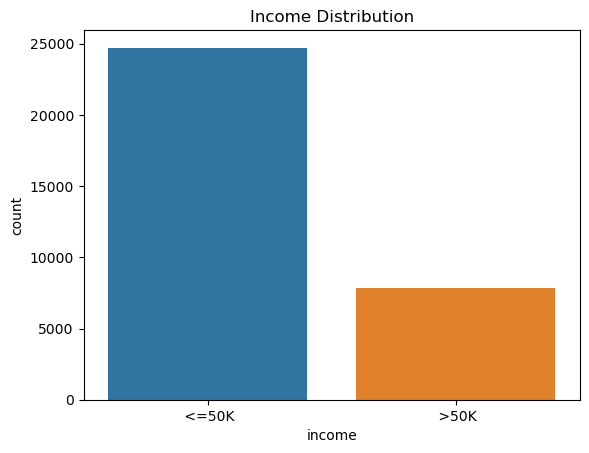

In [7]:
# Step 4: Analyze the target variable
sns.countplot(x='income', data=data)
plt.title('Income Distribution')
plt.show()

In [8]:

# Step 4: Handle missing values (if any)
# Check for missing values: 
data.isnull().sum()


Age                     0
Profession Class        0
Final_census            0
Education               0
Education-num           0
marital-status          0
occupation              0
relationship            0
race                    0
Gender                  0
capital-gain            0
capital-loss            0
hours-per-week          0
country                 0
income                  0
Unnamed: 15         32559
dtype: int64

In [9]:
#dropping the unnamed 15 coulumn from data
data = data.drop('Unnamed: 15', axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education-num     32561 non-null  int64 
 5   marital-status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   Gender            32561 non-null  object
 10  capital-gain      32561 non-null  int64 
 11  capital-loss      32561 non-null  int64 
 12  hours-per-week    32561 non-null  int64 
 13  country           32561 non-null  object
 14  income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:

# Step 5: Visualize numerical features


<AxesSubplot:xlabel='Age', ylabel='Count'>

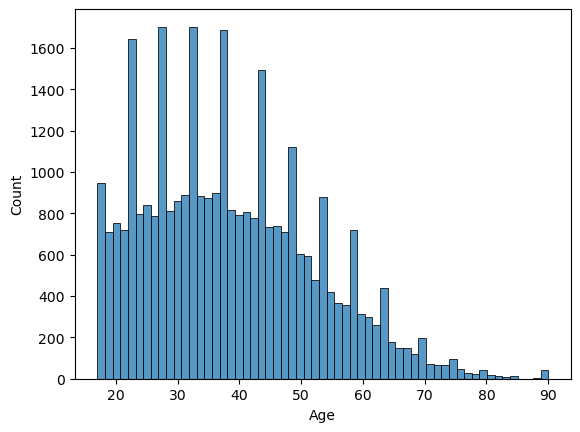

In [15]:
sns.histplot(data['Age'])  # Histogram of 'age'

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

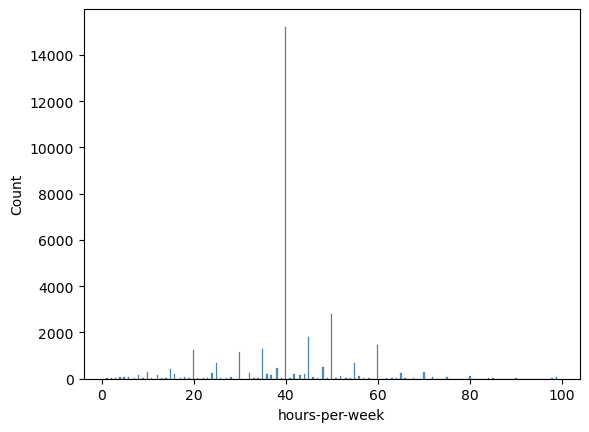

In [16]:
sns.histplot(data['hours-per-week'])  #  plot of 'hours-per-week'

<AxesSubplot:xlabel='Final_census', ylabel='Count'>

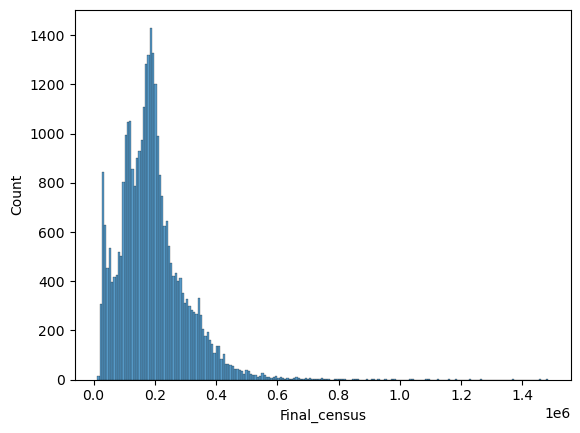

In [17]:
sns.histplot(data['Final_census'])

<AxesSubplot:xlabel='Education-num', ylabel='Count'>

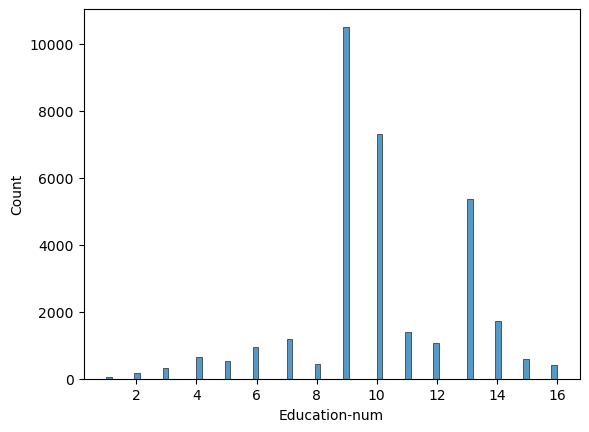

In [18]:
sns.histplot(data['Education-num'])

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

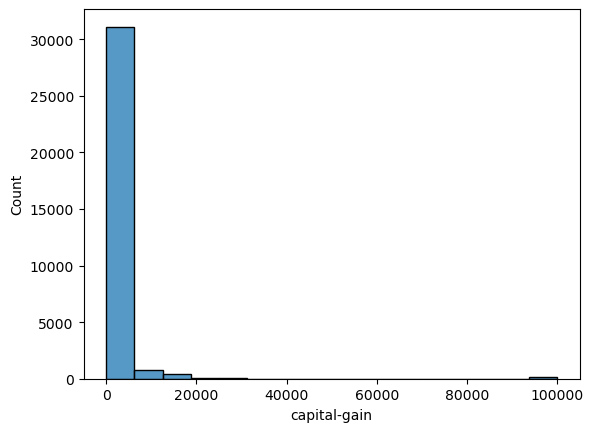

In [19]:
sns.histplot(data['capital-gain'])

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

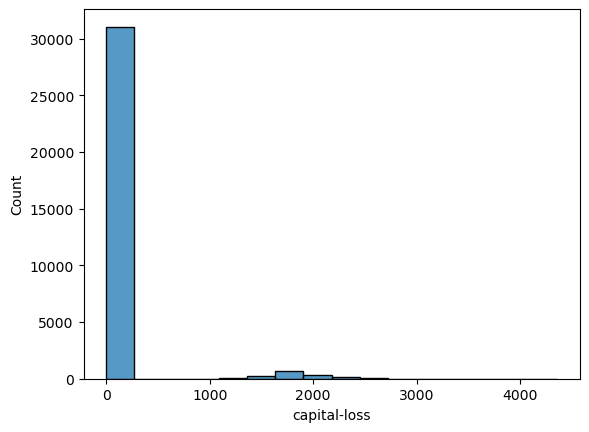

In [20]:
sns.histplot(data['capital-loss'])

<AxesSubplot:xlabel='Profession Class', ylabel='count'>

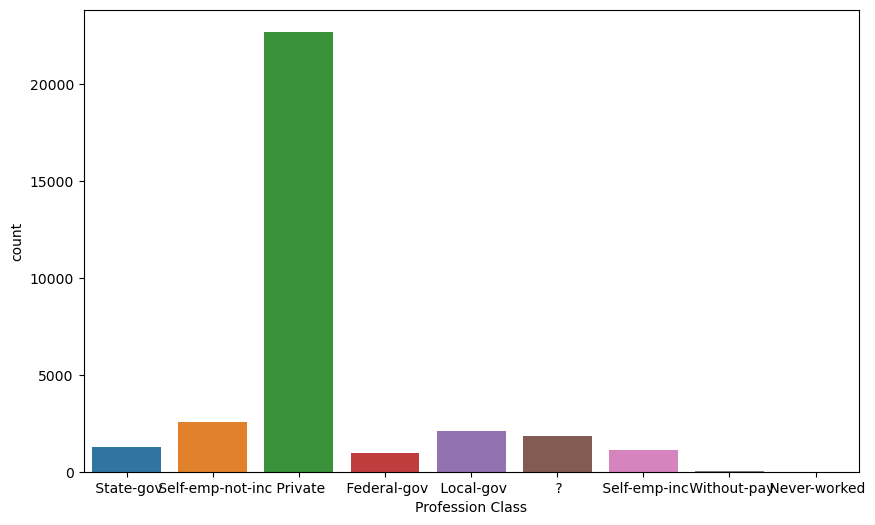

In [21]:
# Step 6: Visualize categorical features
plt.figure(figsize=(10, 6))
sns.countplot(data['Profession Class'])  # Bar plot of 'work-class'


In [22]:
categories = data['Profession Class'].unique()
print(categories)

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [23]:
# We don't know what the '?'category is so repalcing it with name 'other'
data['Profession Class'] = data['Profession Class'].astype(str)
data['Profession Class'] = data['Profession Class'].str.strip()
data['Profession Class'] = data['Profession Class'].replace('?', 'Other source')


<AxesSubplot:xlabel='Profession Class', ylabel='count'>

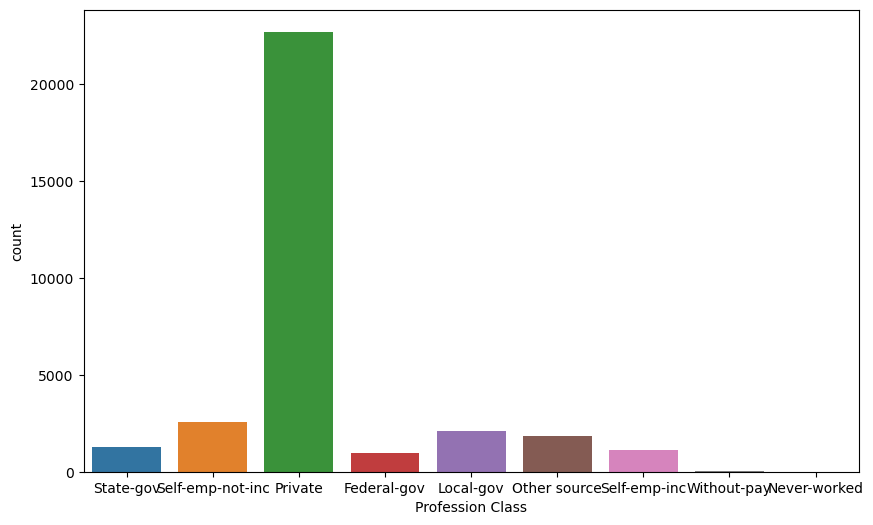

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data['Profession Class']) 

<AxesSubplot:xlabel='Education', ylabel='count'>

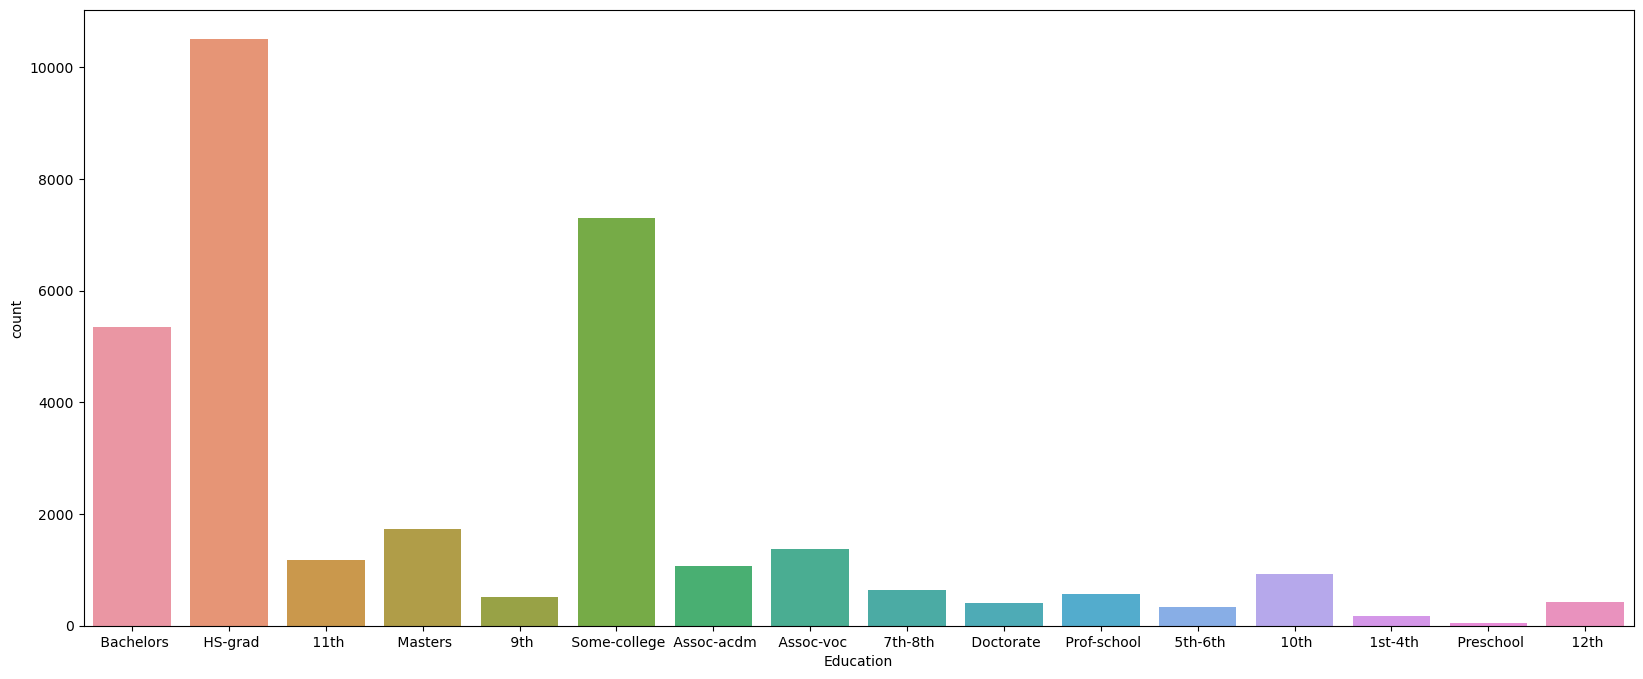

In [25]:
plt.figure(figsize=(20, 8))
sns.countplot(data['Education'])


<AxesSubplot:xlabel='marital-status', ylabel='count'>

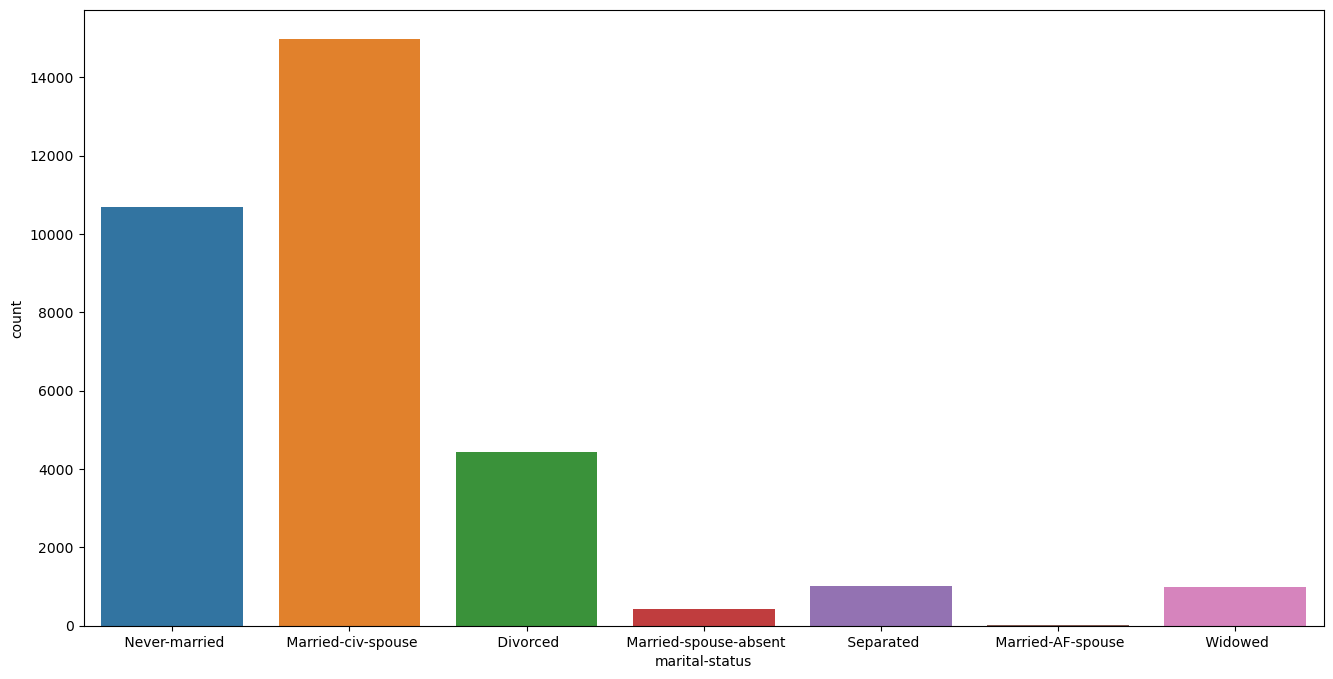

In [26]:
plt.figure(figsize=(16, 8))
sns.countplot(data['marital-status'])

<AxesSubplot:xlabel='occupation', ylabel='count'>

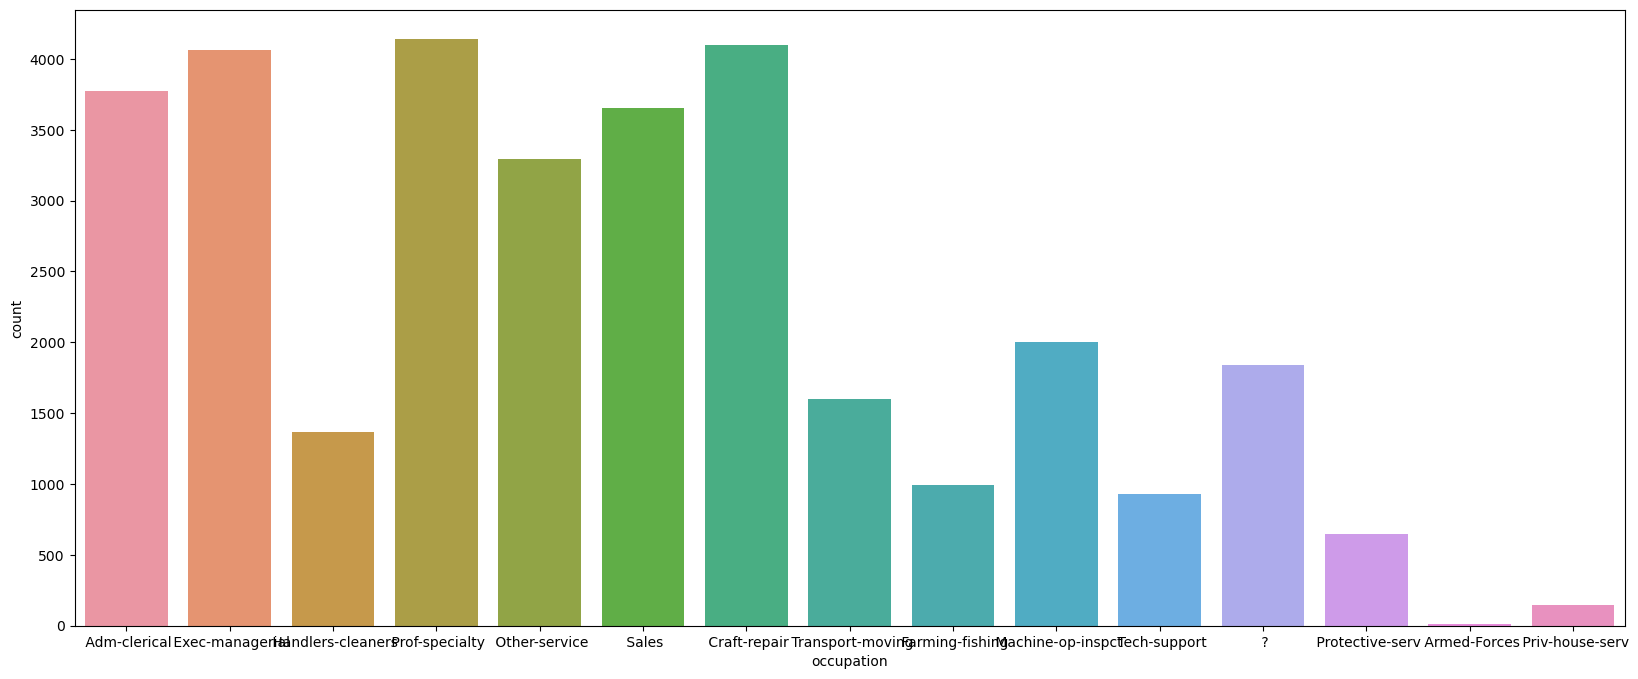

In [27]:
plt.figure(figsize=(20, 8))
sns.countplot(data['occupation'])

In [28]:
# We don't know what the '?'category is so repalcing it with name 'other'
data['occupation'] = data['occupation'].astype(str)
data['occupation'] = data['occupation'].str.strip()
data['occupation'] = data['occupation'].replace('?', 'Other')

<AxesSubplot:xlabel='occupation', ylabel='count'>

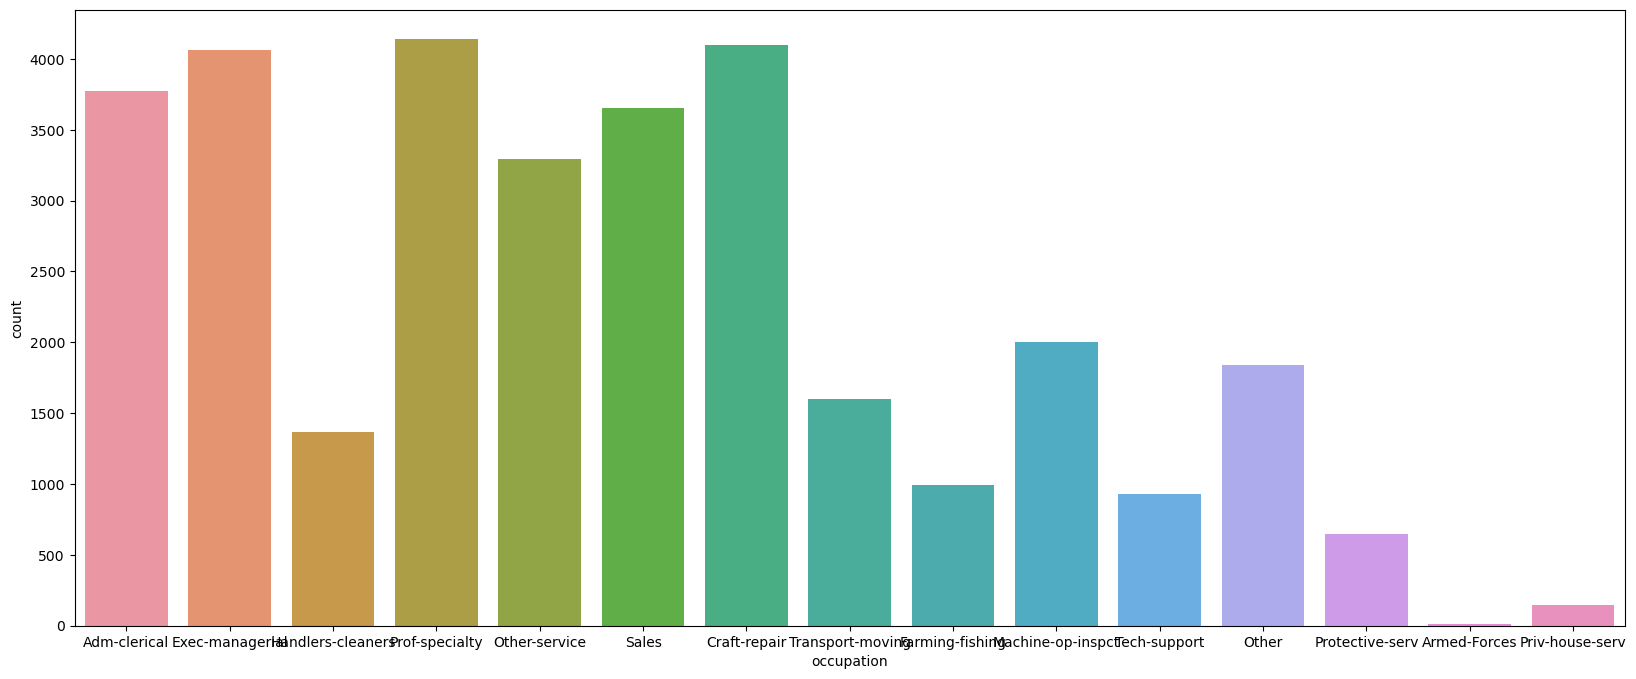

In [29]:
plt.figure(figsize=(20, 8))
sns.countplot(data['occupation'])

<AxesSubplot:xlabel='relationship', ylabel='count'>

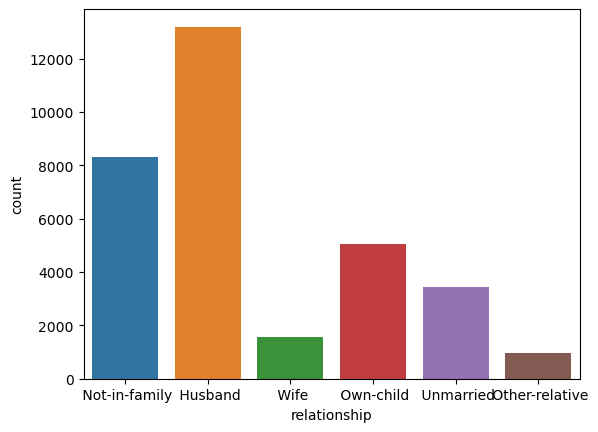

In [30]:
sns.countplot(data['relationship'])

<AxesSubplot:xlabel='race', ylabel='count'>

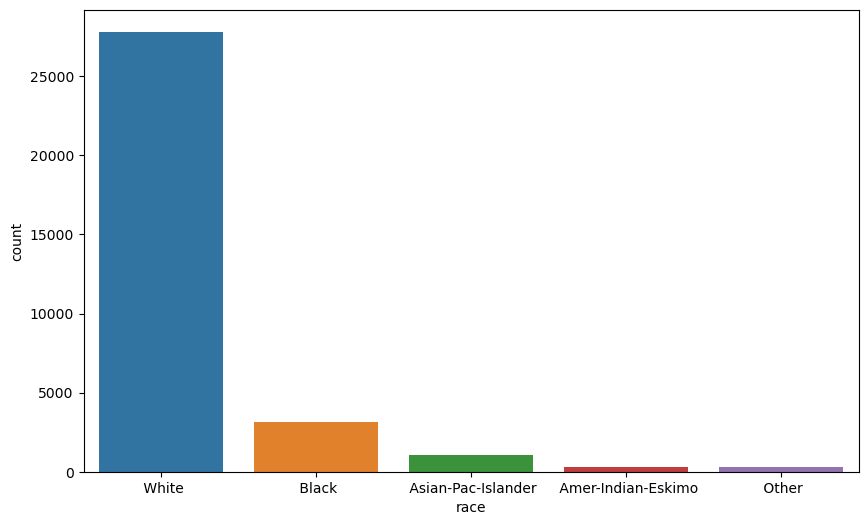

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data['race'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

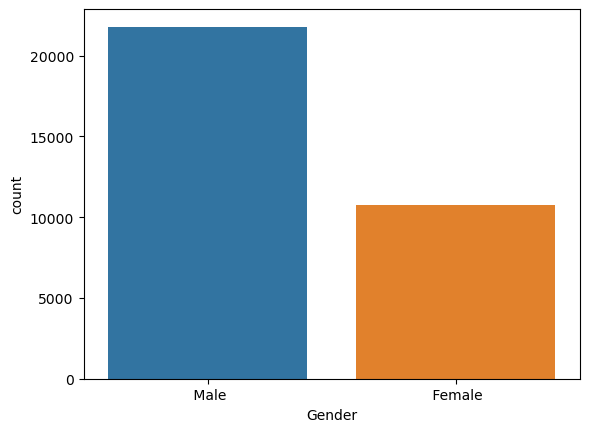

In [32]:
sns.countplot(data['Gender'])

<AxesSubplot:xlabel='country', ylabel='count'>

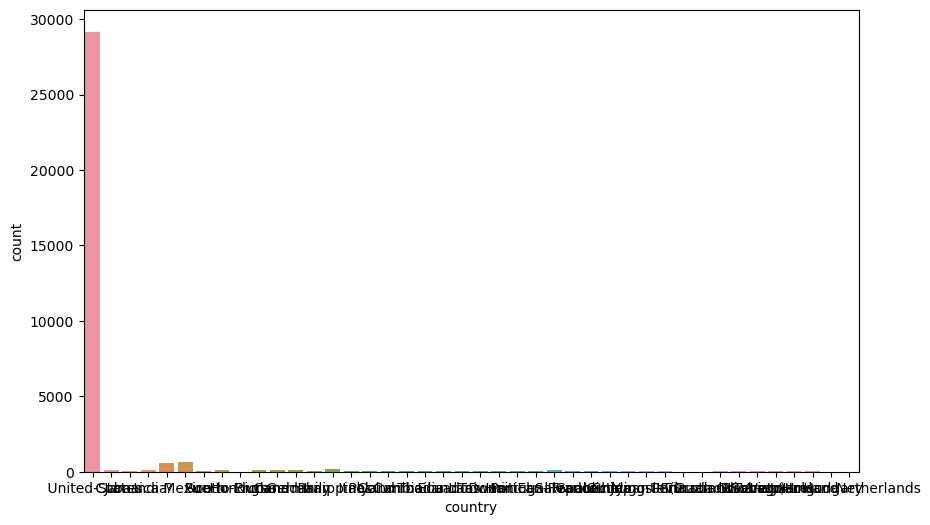

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data['country'])

In [34]:
# We don't know what the '?'category is so repalcing it with name 'other'
data['country'] = data['country'].astype(str)
data['country'] = data['country'].str.strip()
data['country'] = data['country'].replace('?', 'Other')

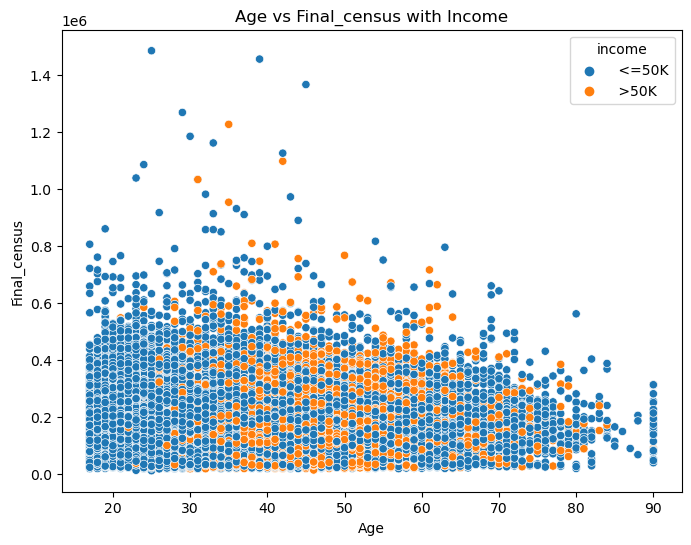

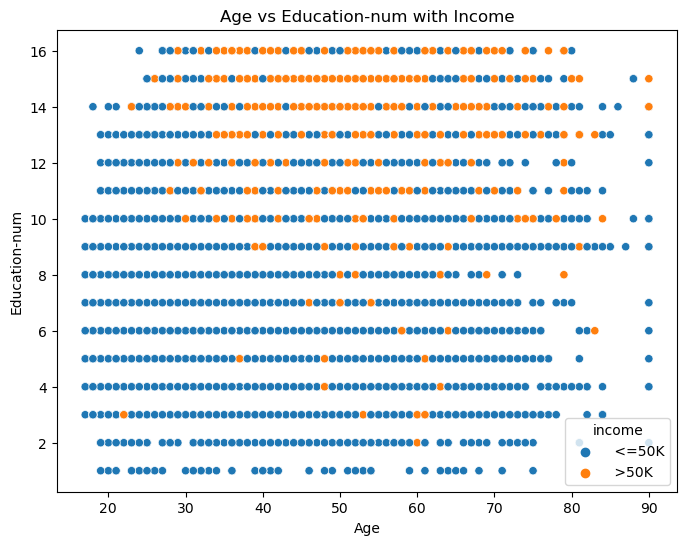

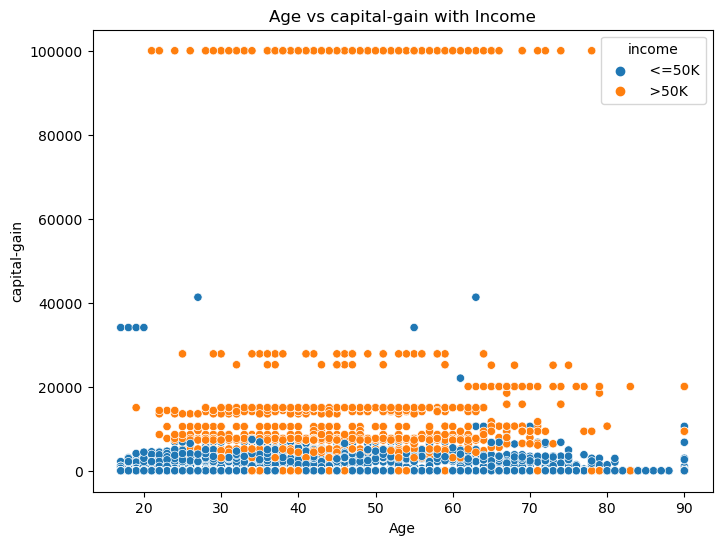

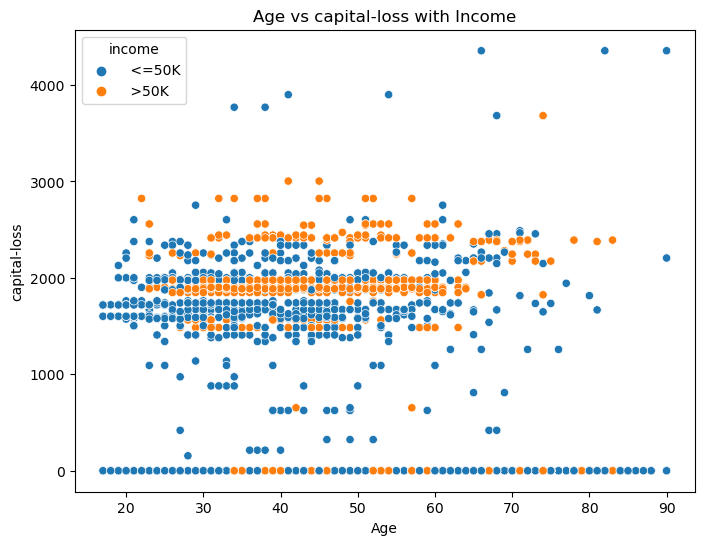

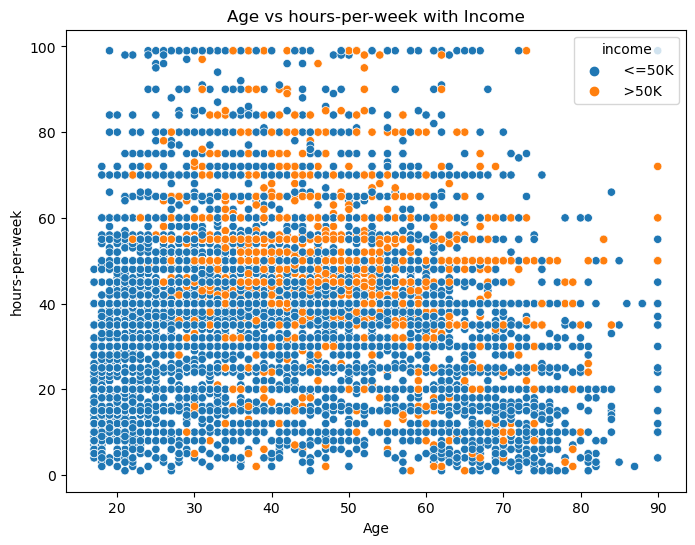

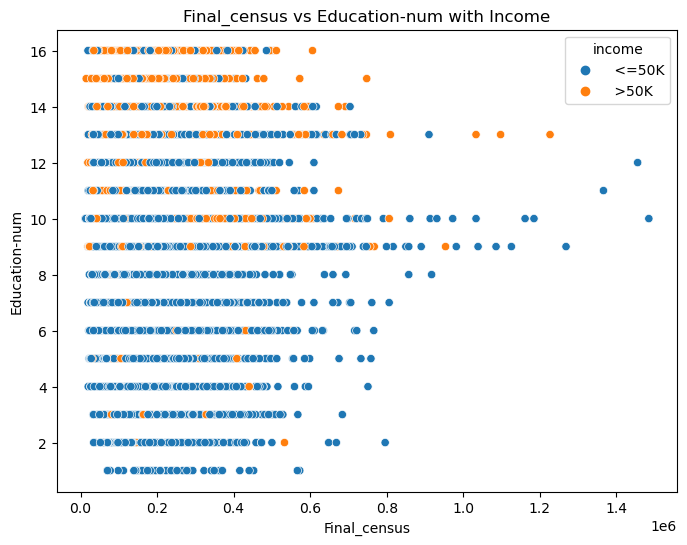

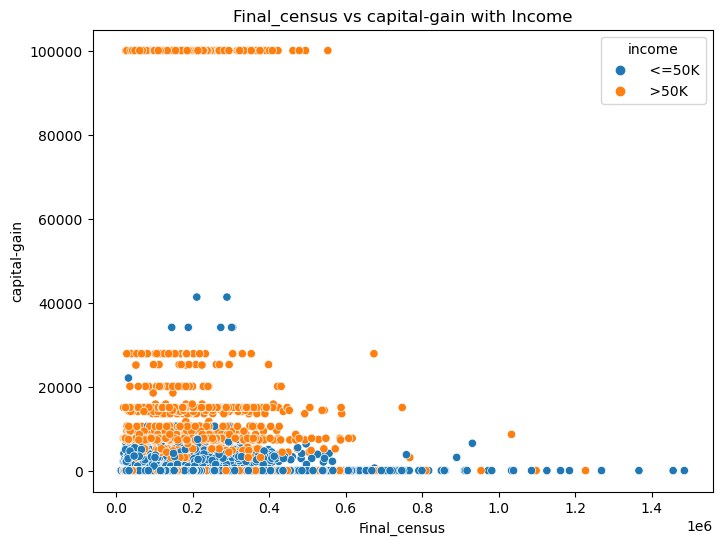

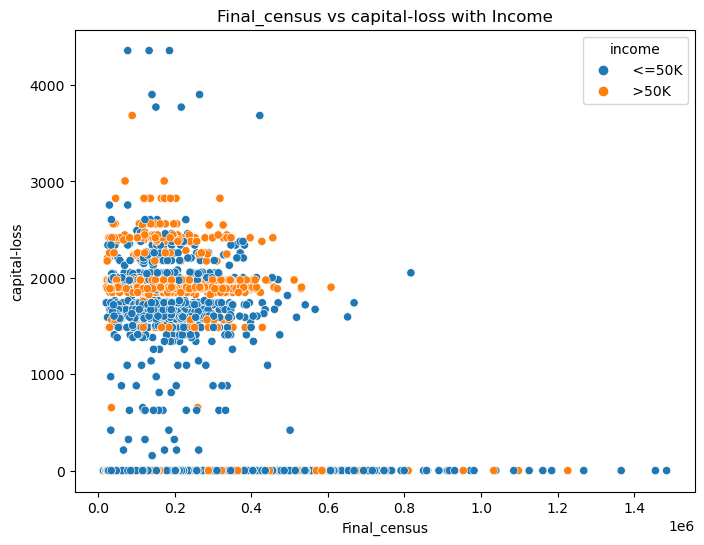

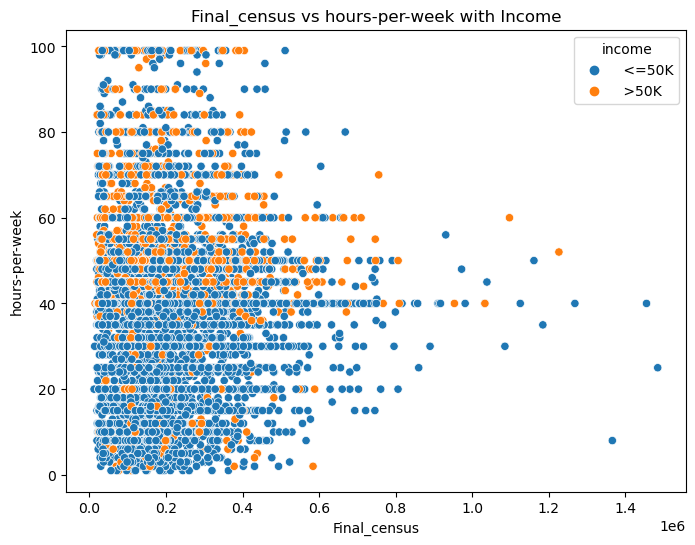

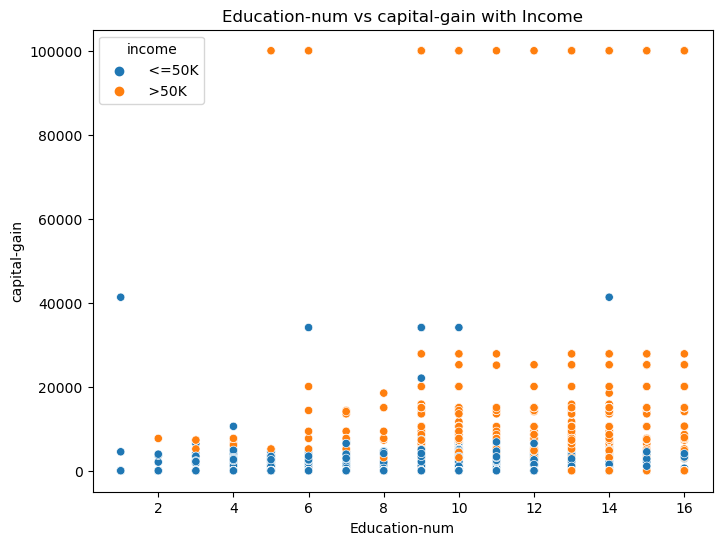

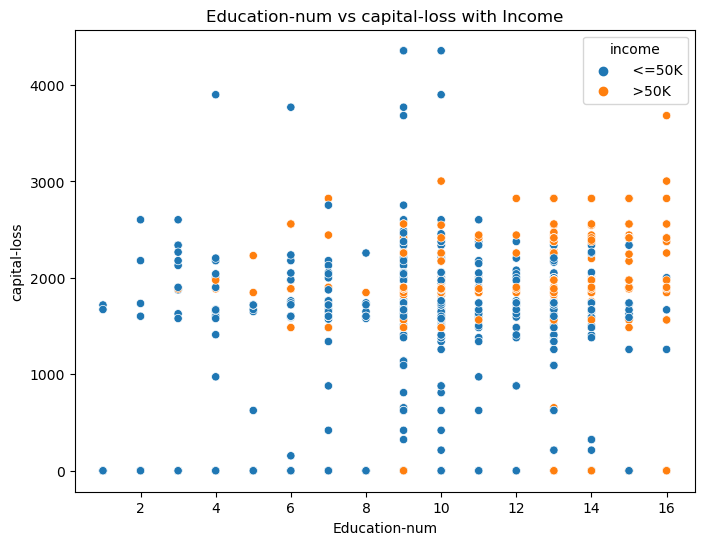

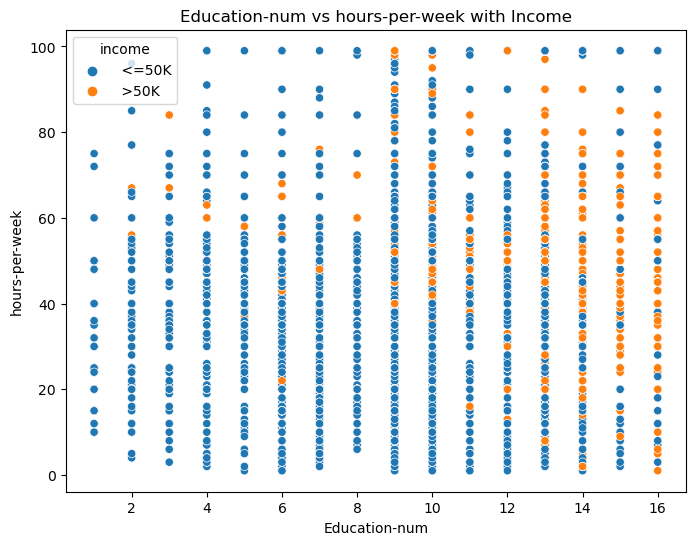

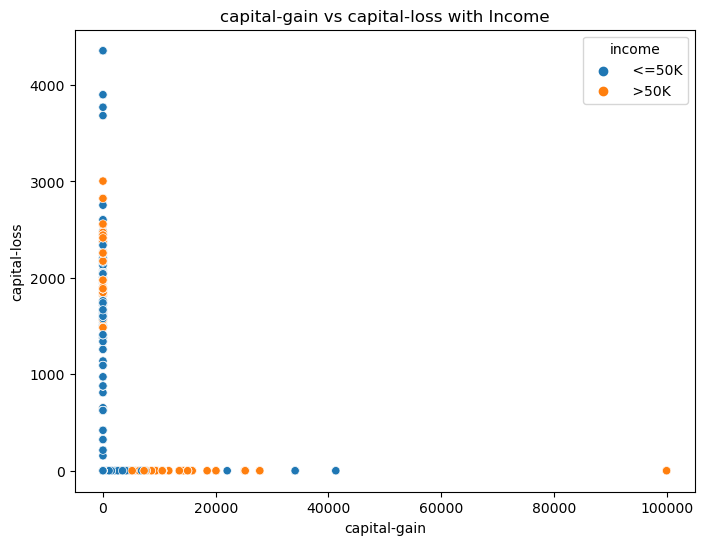

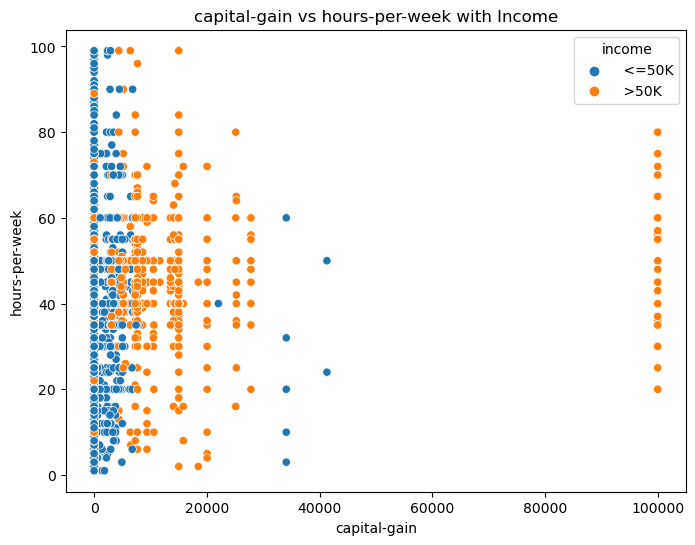

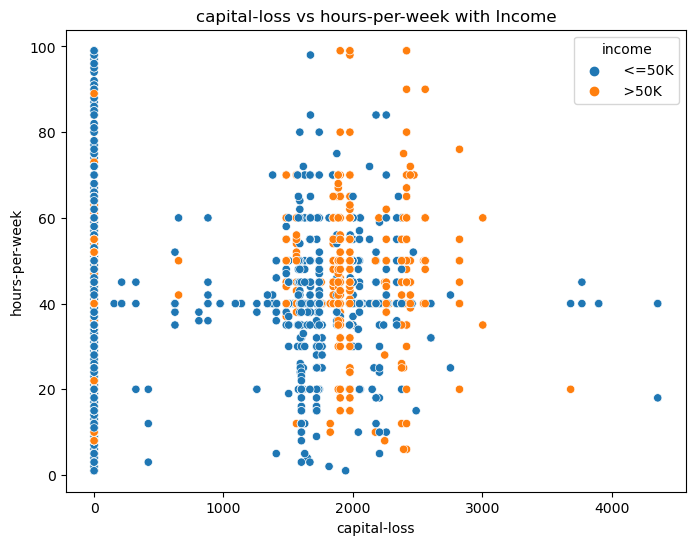

In [35]:

# Select numerical features
numerical_features = ['Age', 'Final_census', 'Education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create scatter plots with hue as 'income'
for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=numerical_features[i], y=numerical_features[j], hue='income', data=data)
        plt.title(f'{numerical_features[i]} vs {numerical_features[j]} with Income')
        plt.show()


In [36]:

# Analyze feature interactions with categorical variables
categorical_features = ['Profession Class', 'Education','marital-status', 'occupation','relationship','race','Gender','country']

# Cross-tabulation of categorical variables
for feature in categorical_features:
    ct = pd.crosstab(data[feature], data['income'])
    print(f"Cross-tabulation for {feature}:\n{ct}\n")





Cross-tabulation for Profession Class:
income             <=50K   >50K
Profession Class               
Federal-gov          589    371
Local-gov           1476    617
Never-worked           7      0
Other source        1645    191
Private            17733   4963
Self-emp-inc         494    622
Self-emp-not-inc    1817    724
State-gov            945    353
Without-pay           14      0

Cross-tabulation for Education:
income          <=50K   >50K
Education                   
 10th             871     62
 11th            1115     60
 12th             400     33
 1st-4th          162      6
 5th-6th          317     16
 7th-8th          606     40
 9th              487     27
 Assoc-acdm       802    265
 Assoc-voc       1021    361
 Bachelors       3134   2221
 Doctorate        107    306
 HS-grad         8826   1675
 Masters          764    959
 Preschool         51      0
 Prof-school      153    423
 Some-college    5904   1387

Cross-tabulation for marital-status:
income          

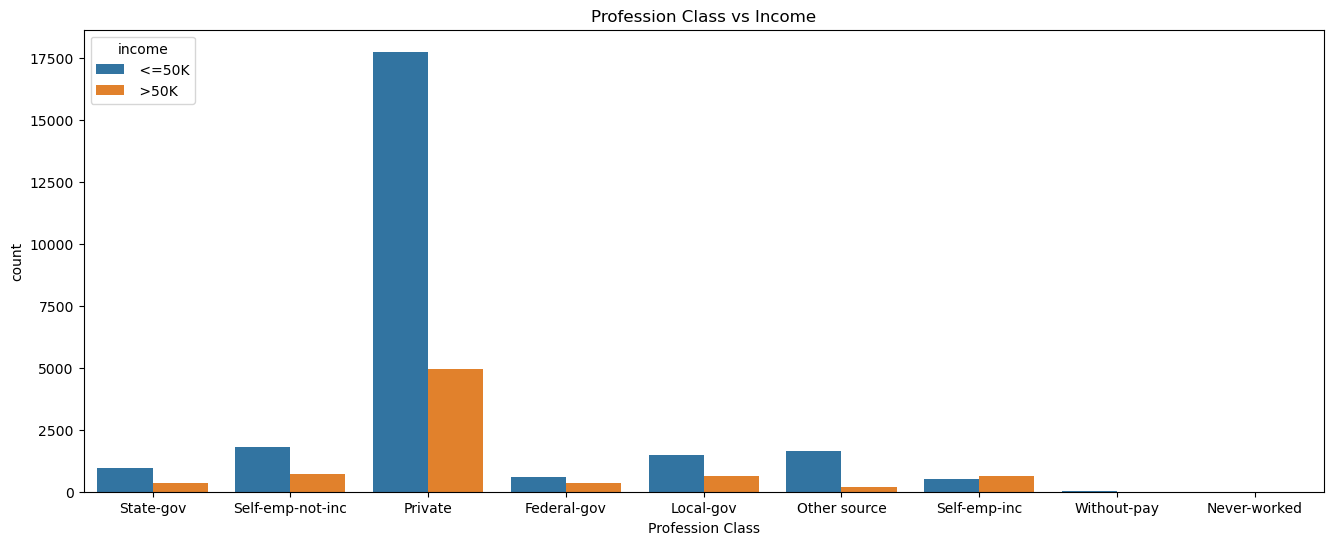

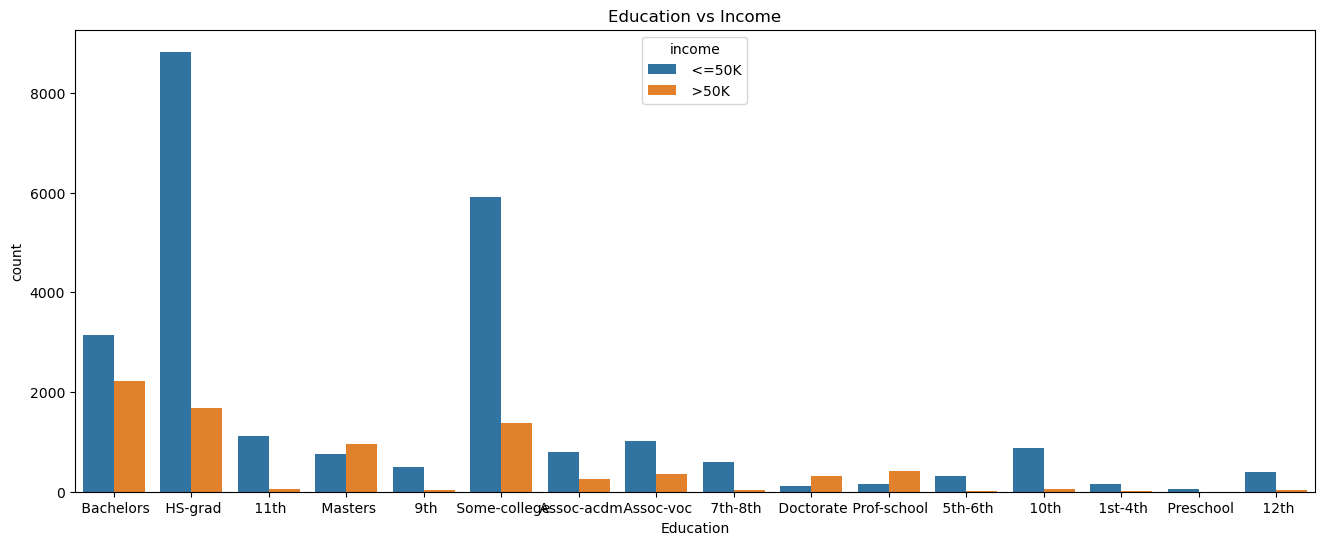

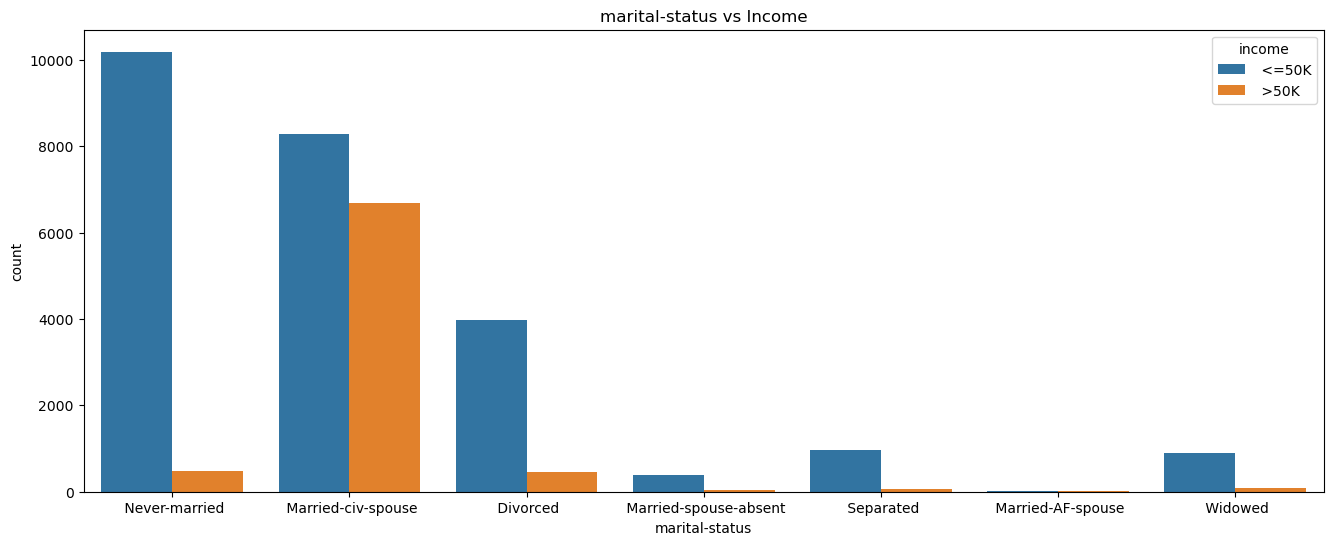

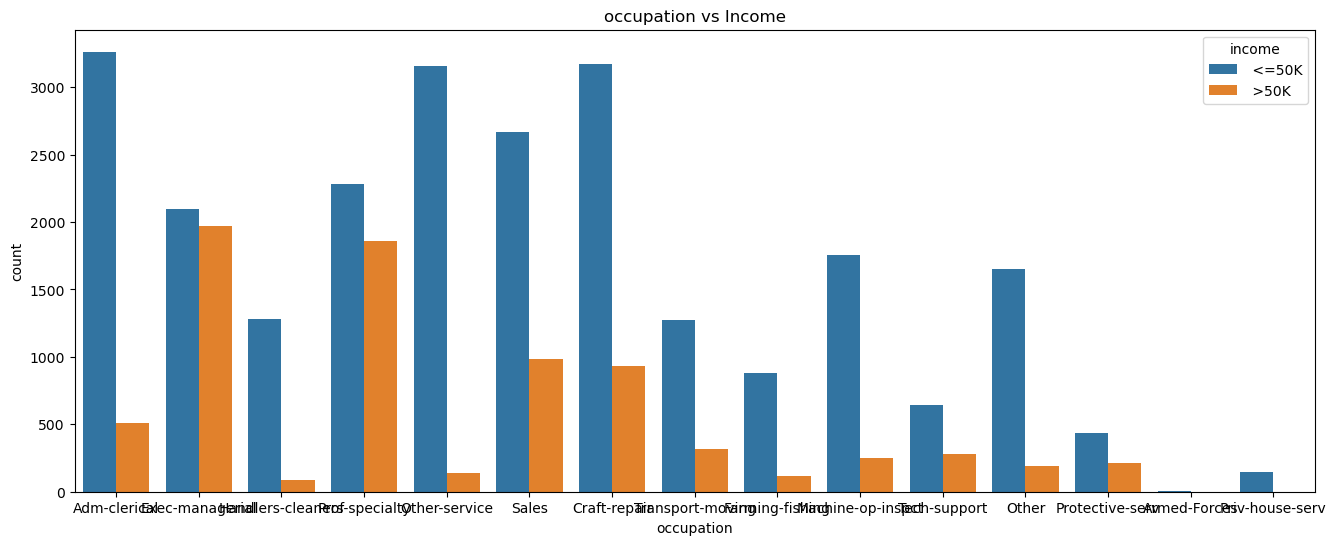

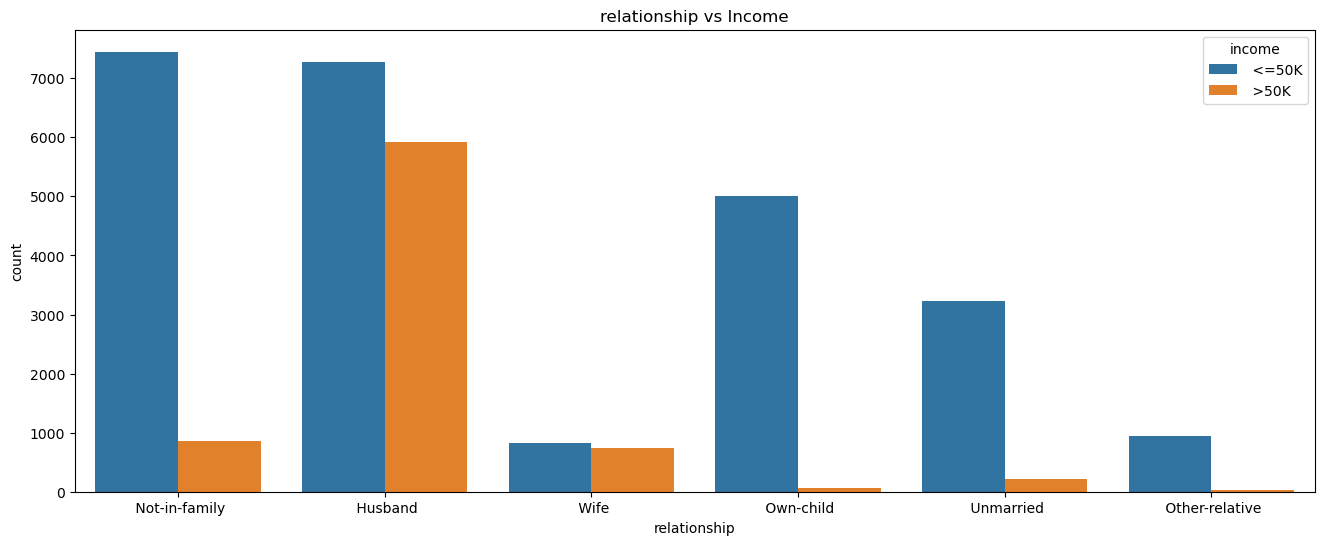

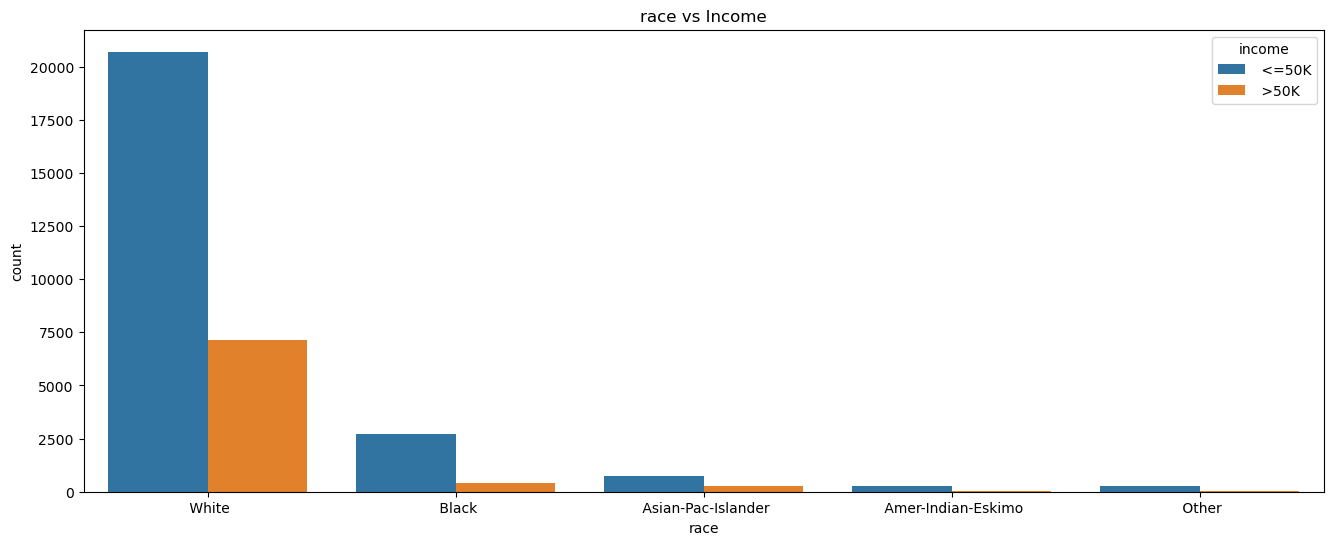

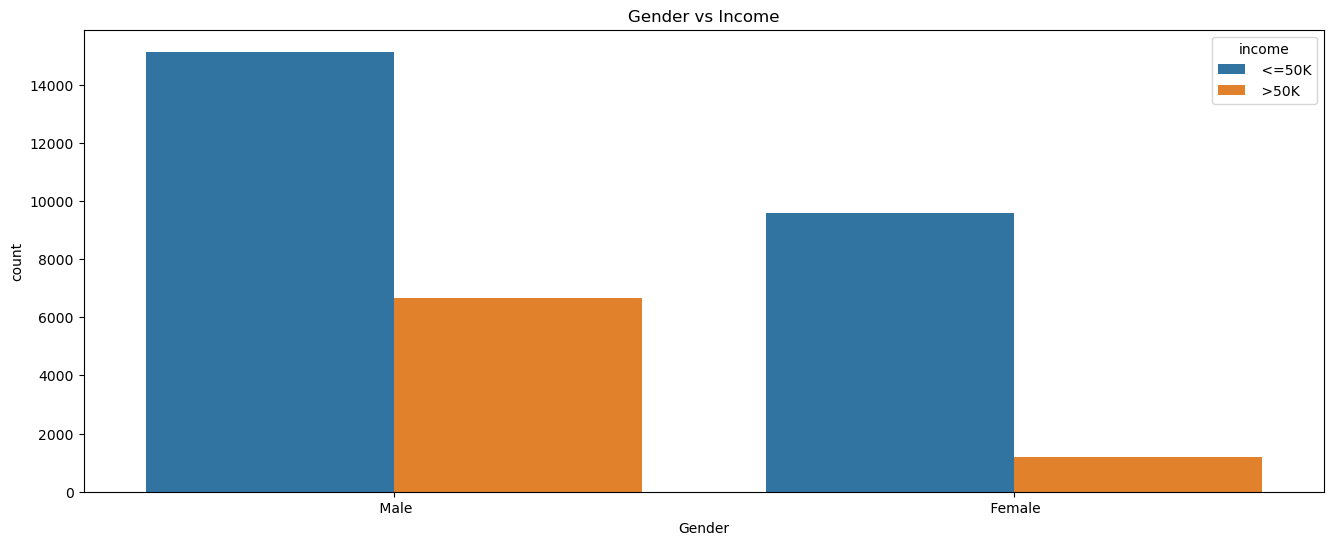

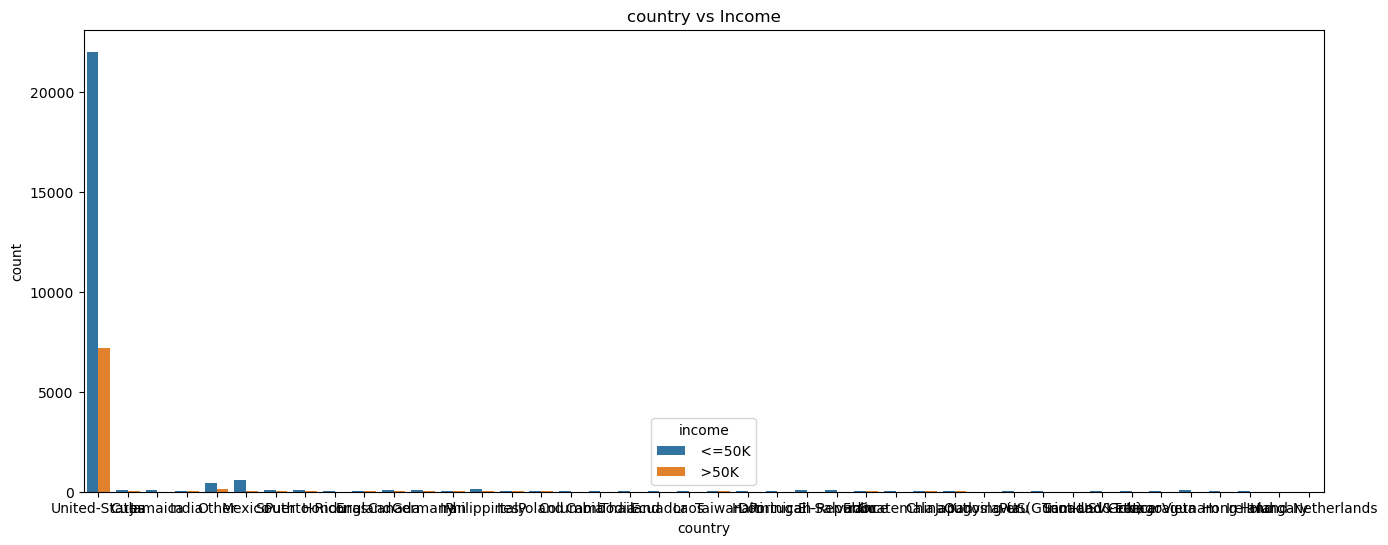

In [37]:
categorical_features = ['Profession Class', 'Education','marital-status', 'occupation','relationship','race','Gender','country']

for feature in categorical_features:
    plt.figure(figsize=(16, 6))
    sns.countplot(x=feature, hue='income', data=data)
    plt.title(f'{feature} vs Income')
    plt.show()

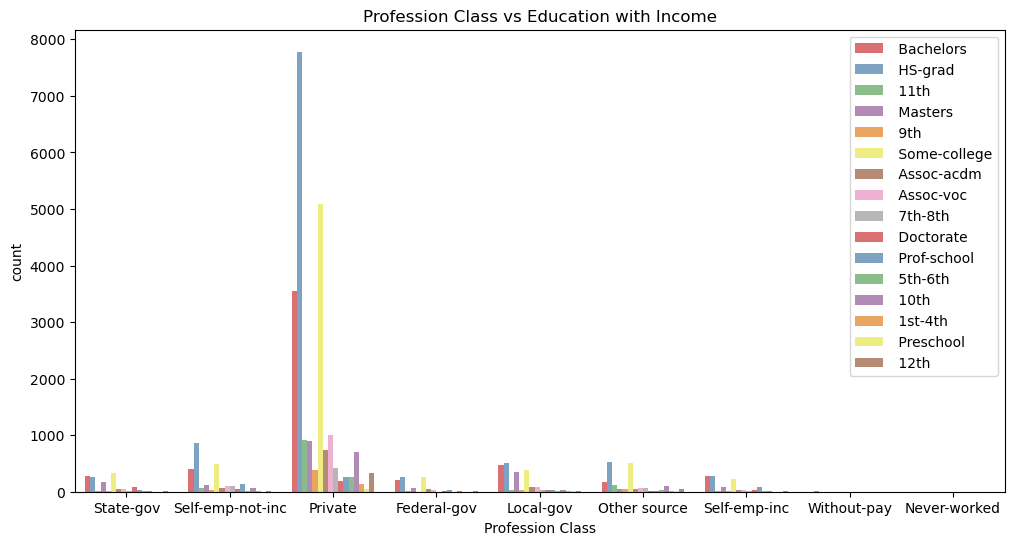

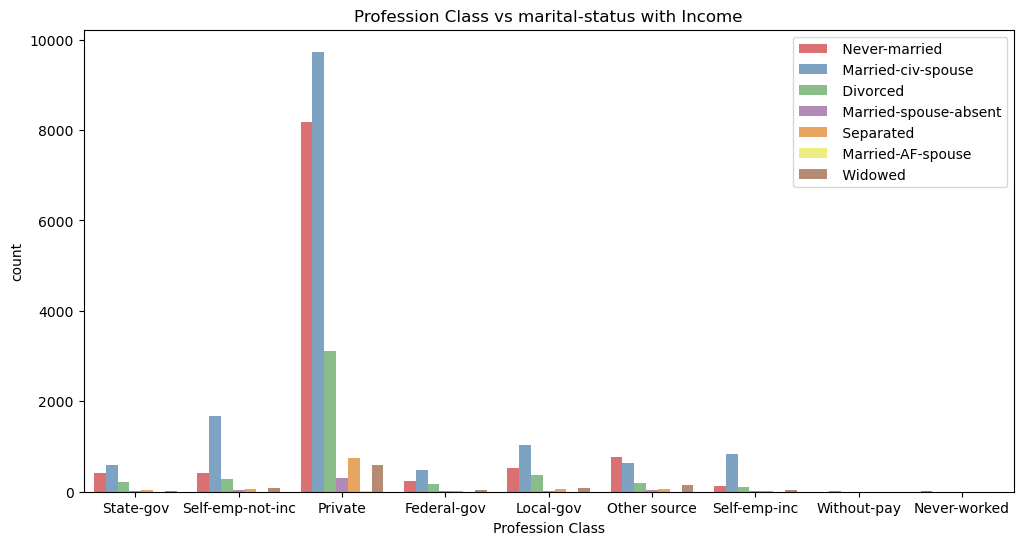

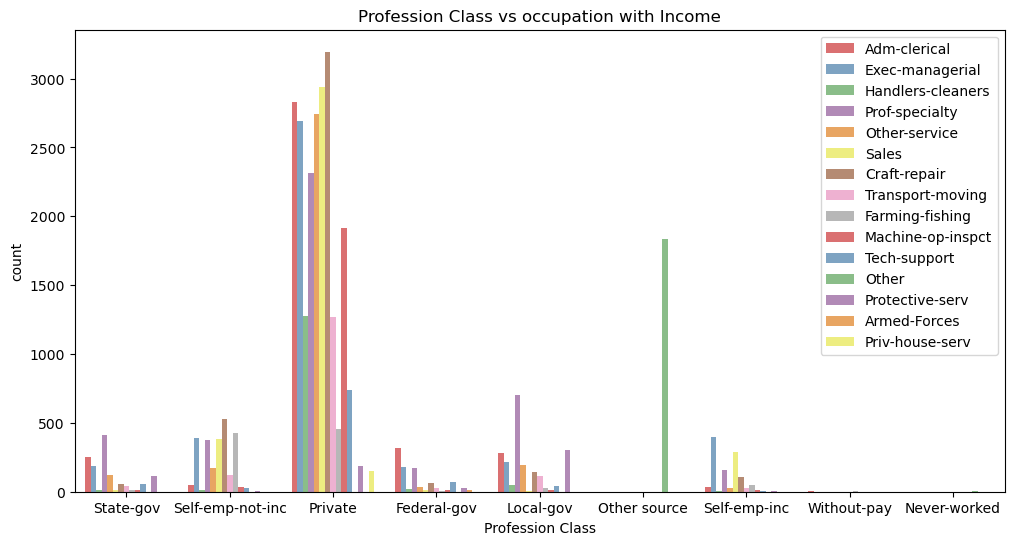

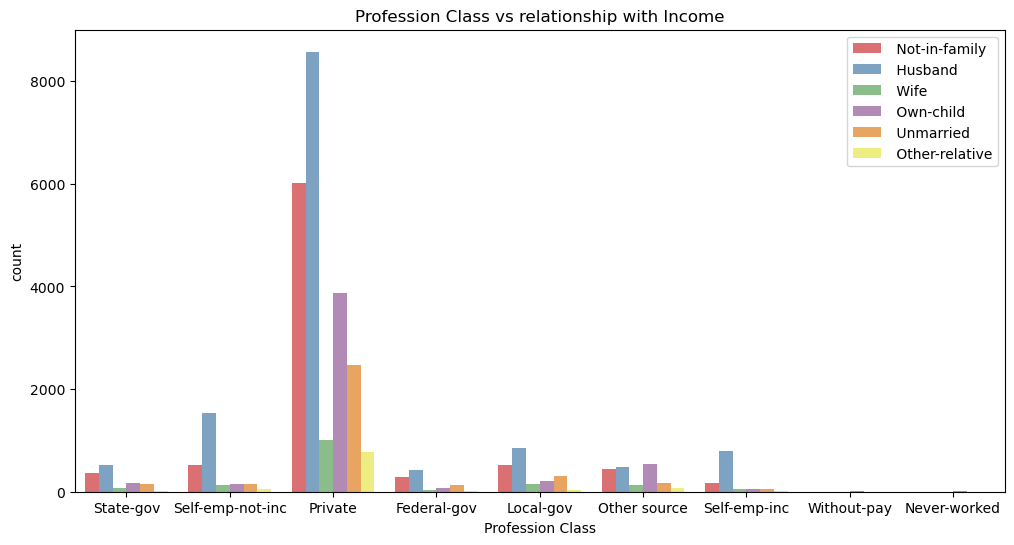

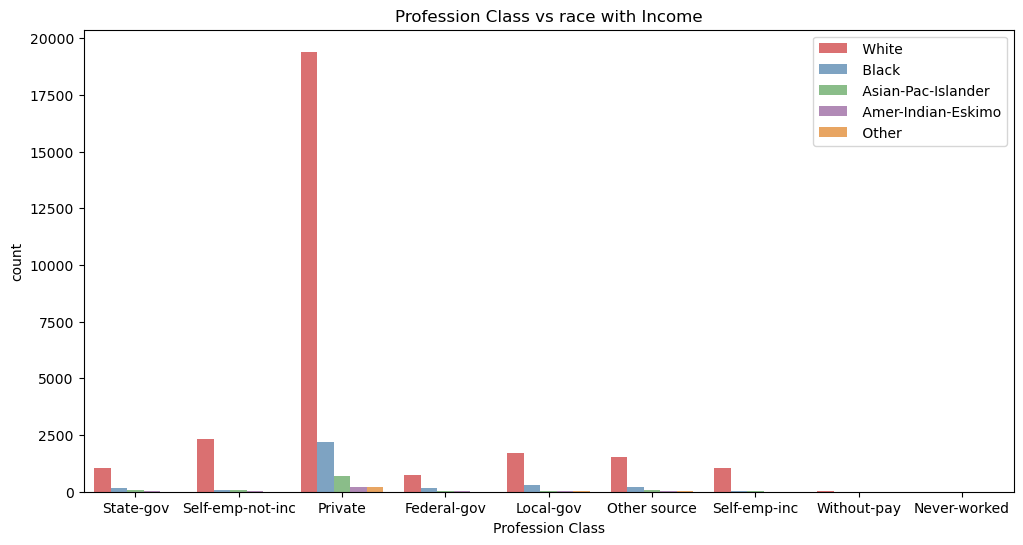

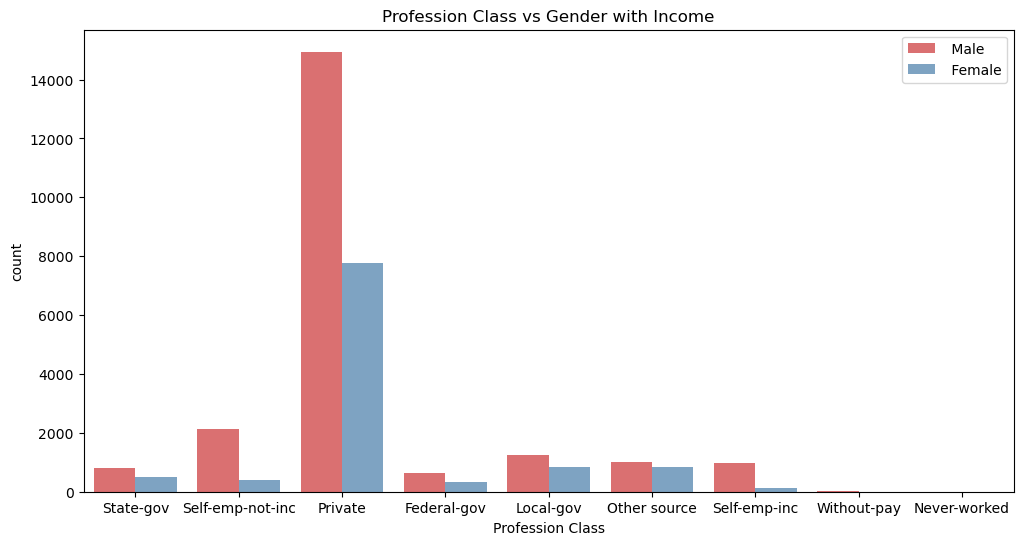

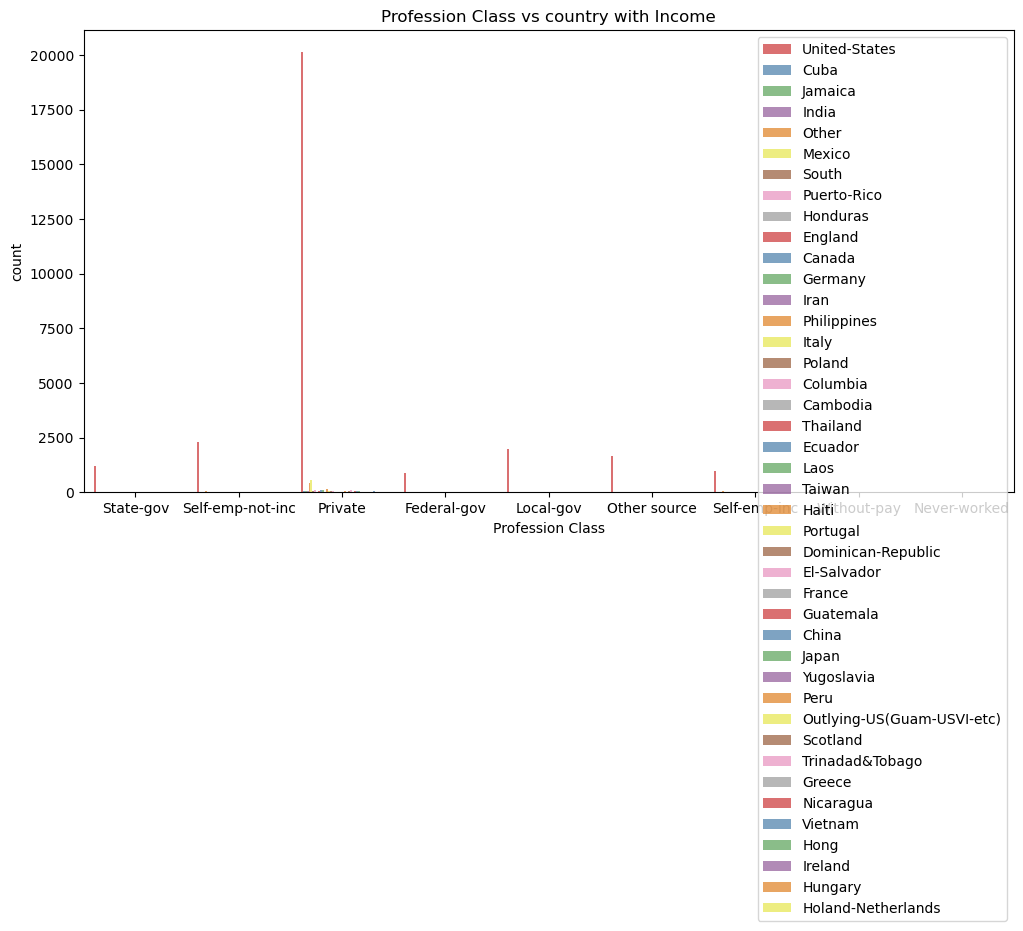

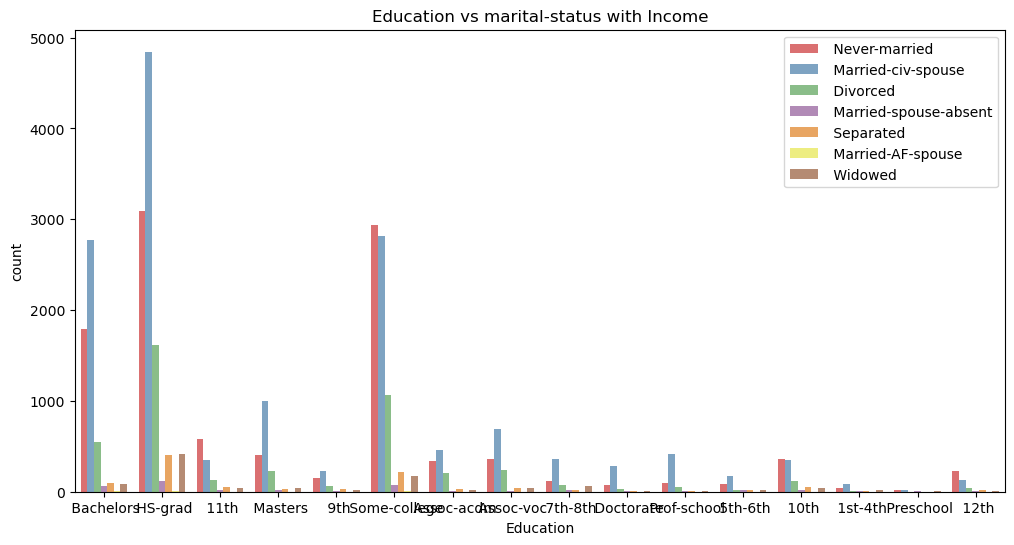

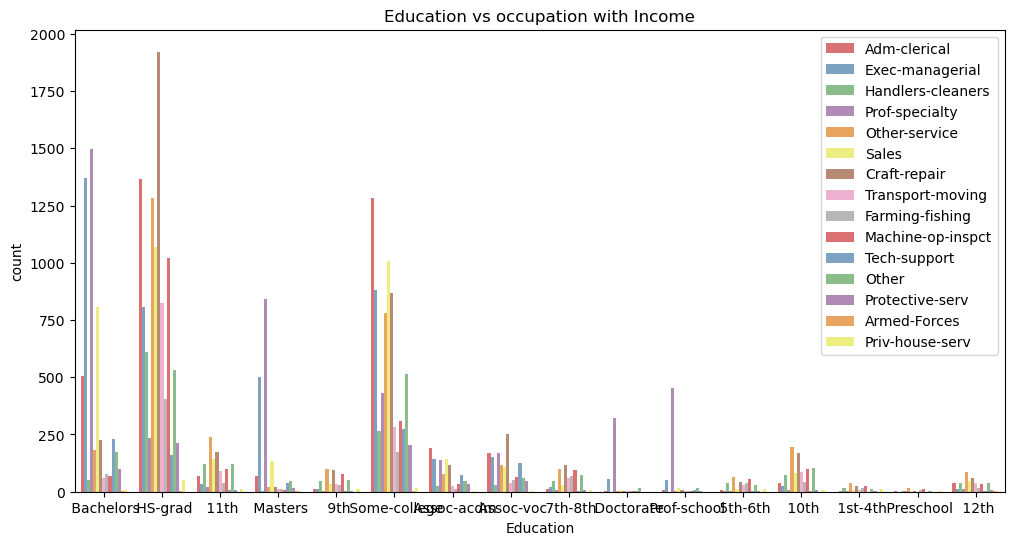

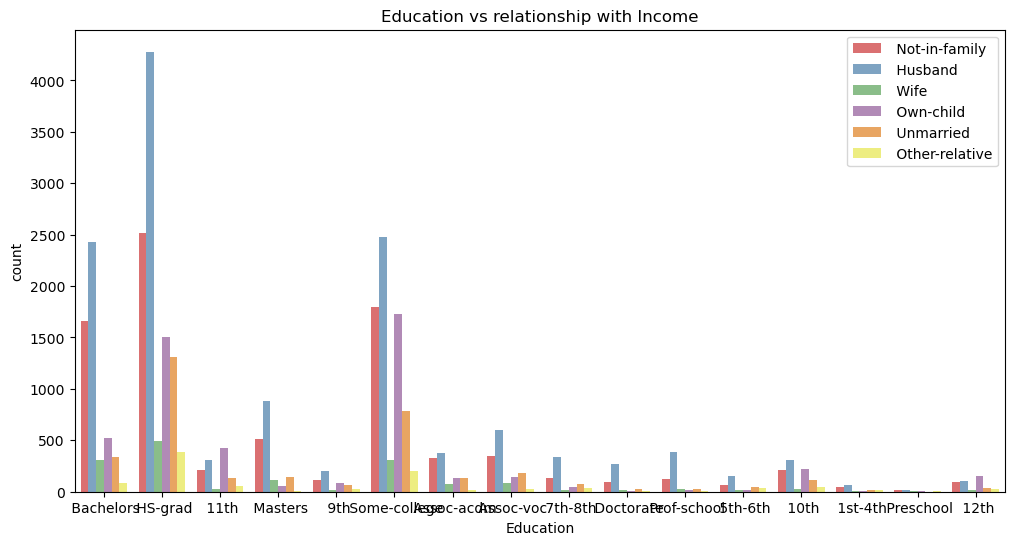

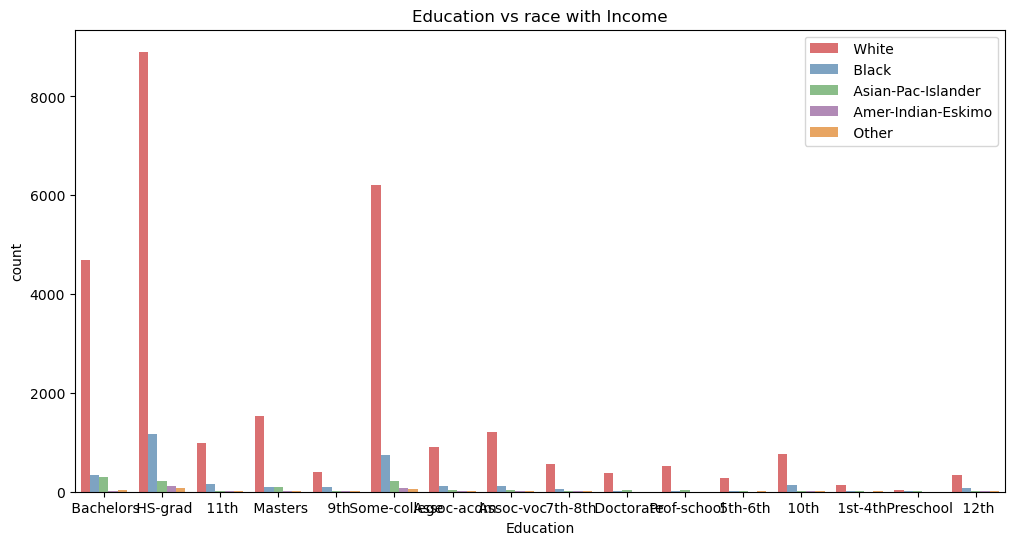

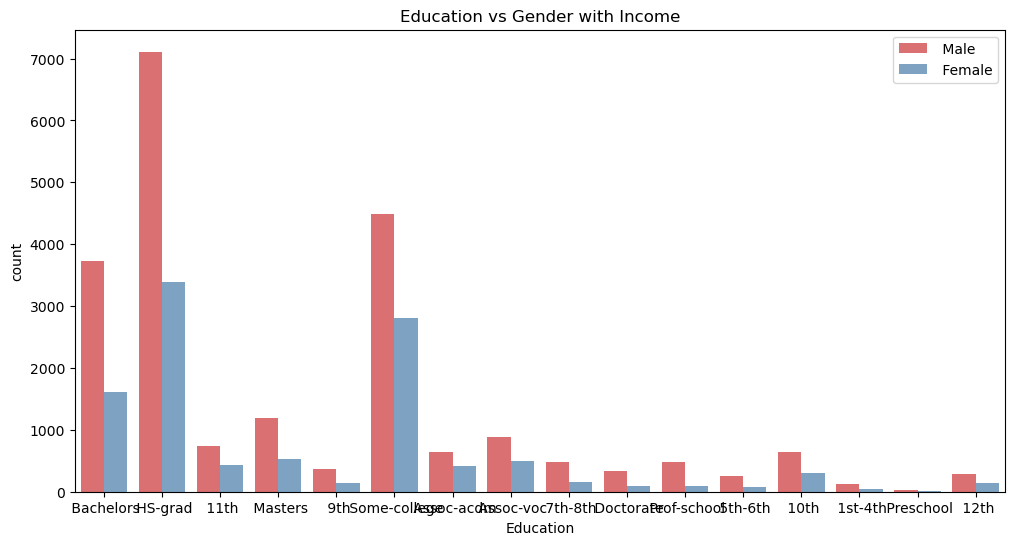

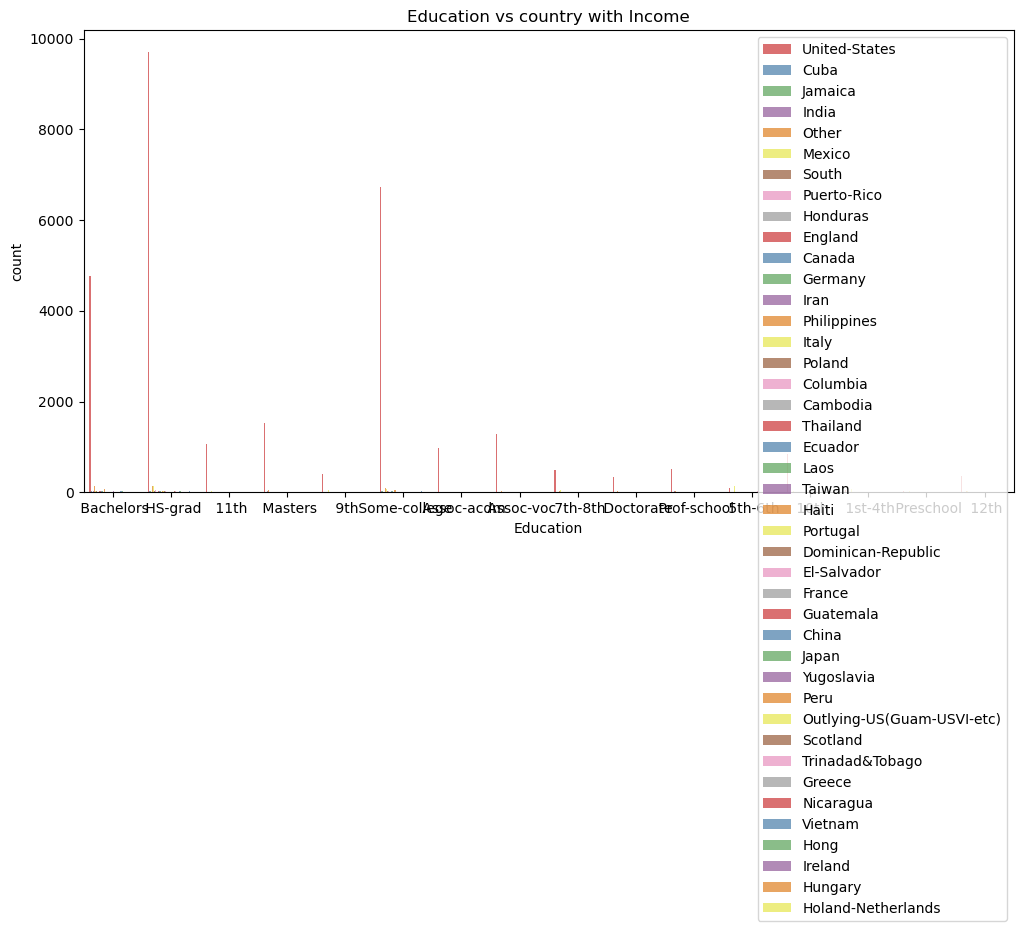

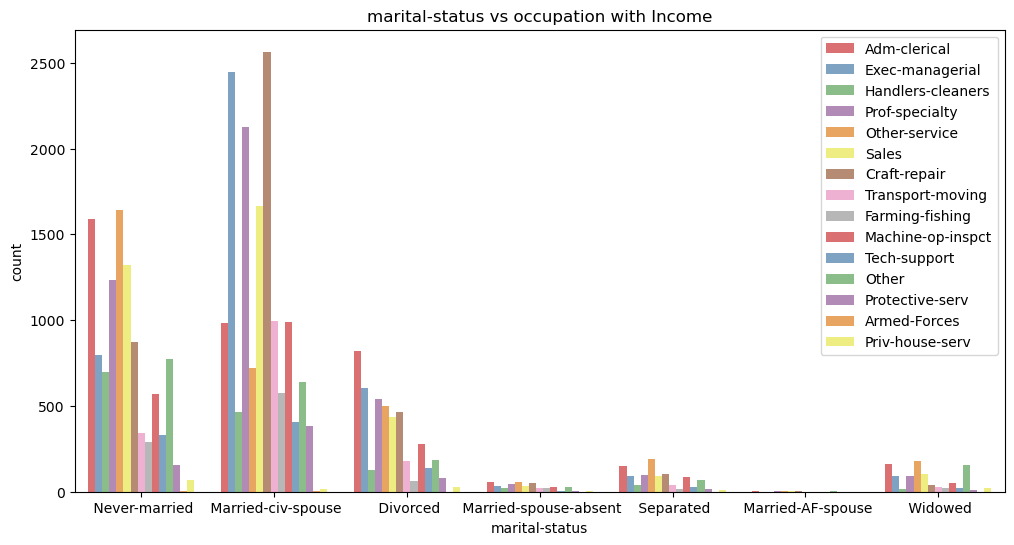

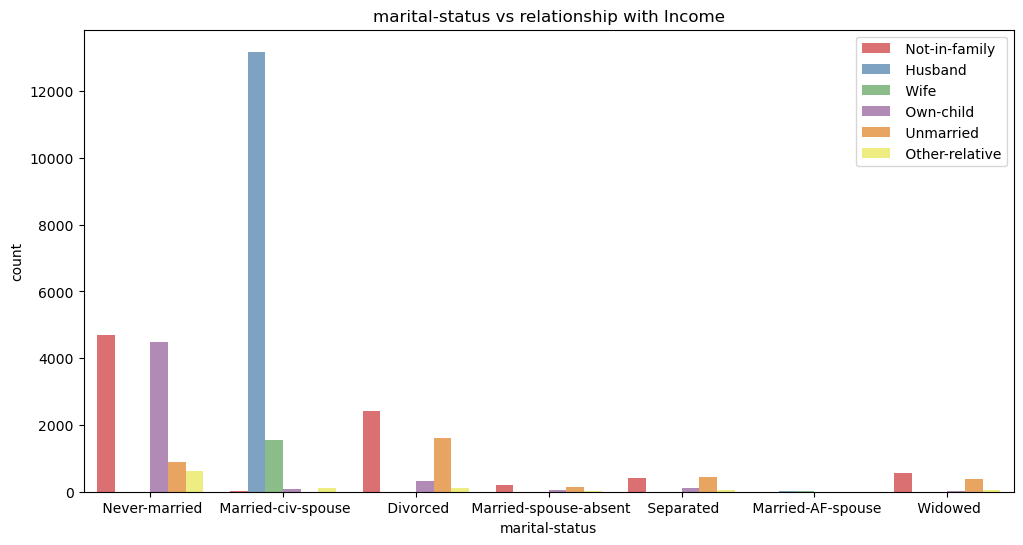

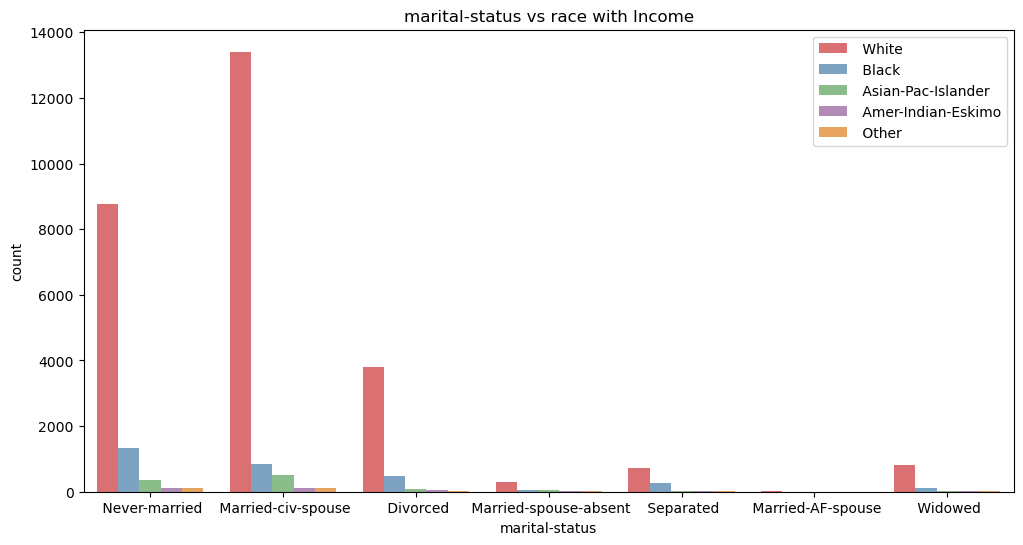

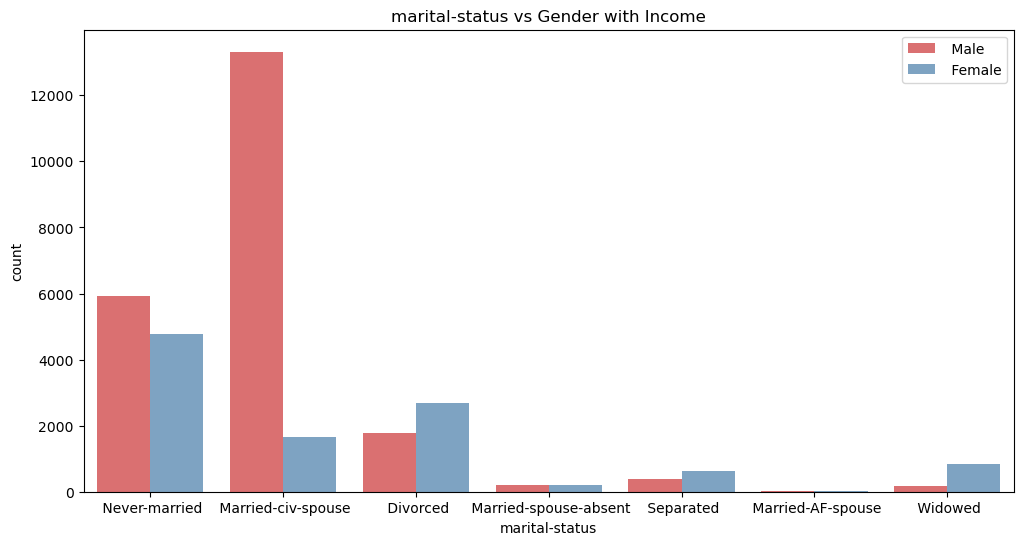

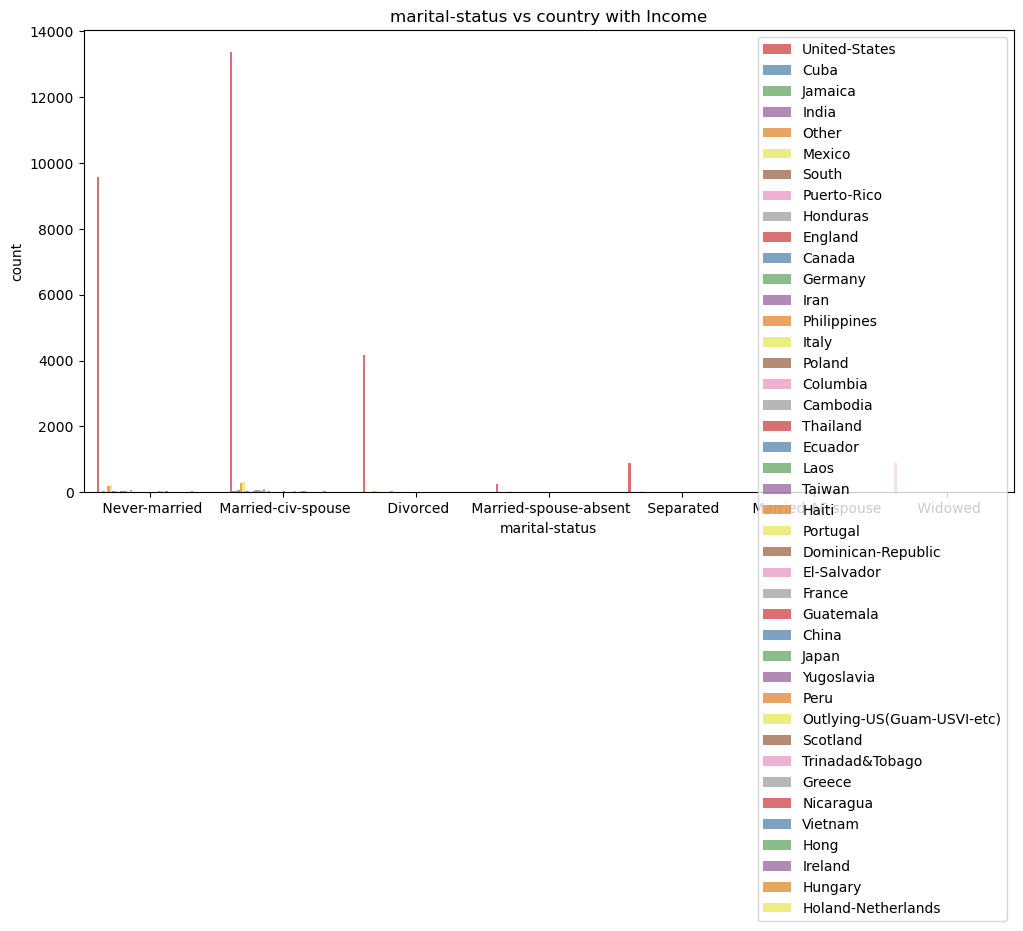

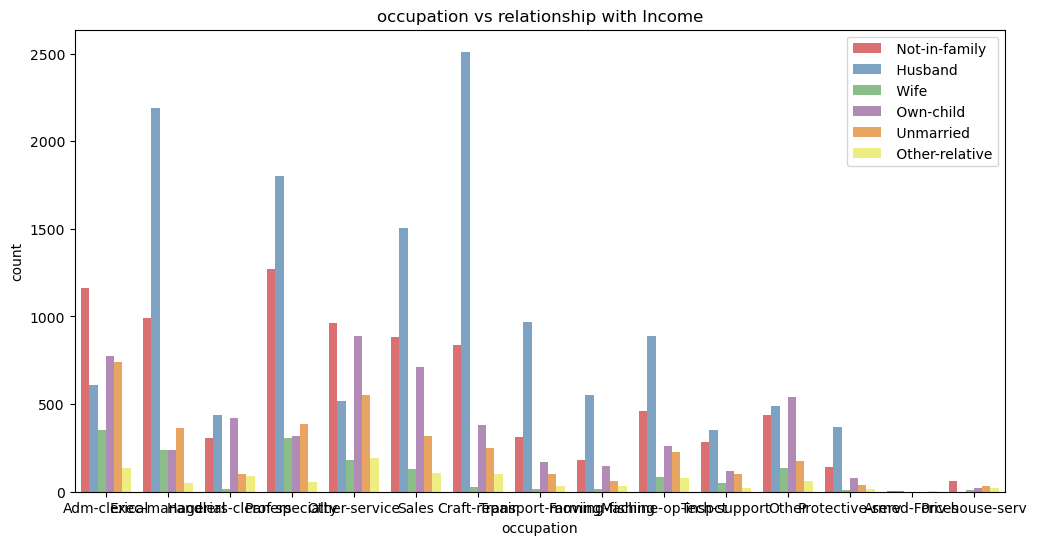

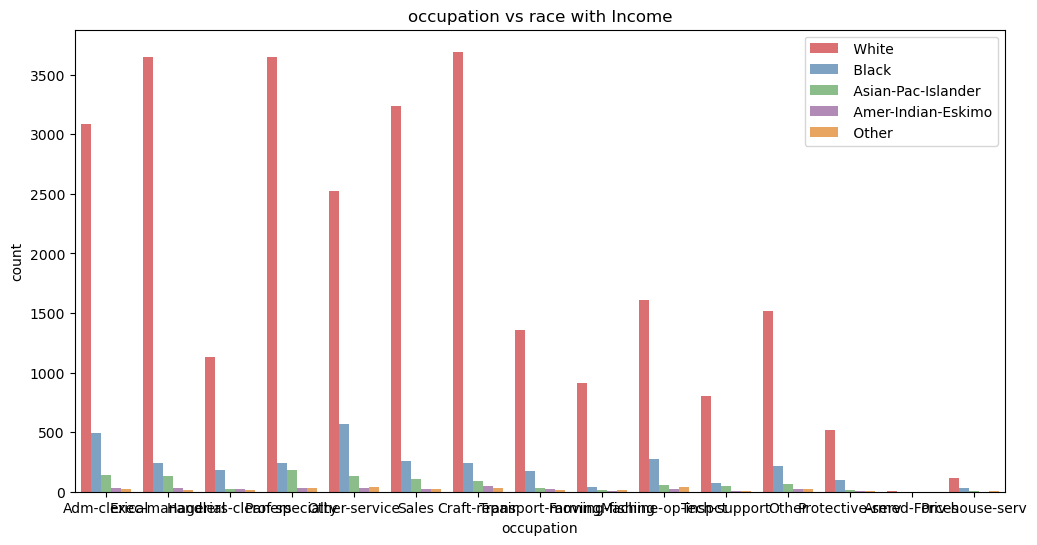

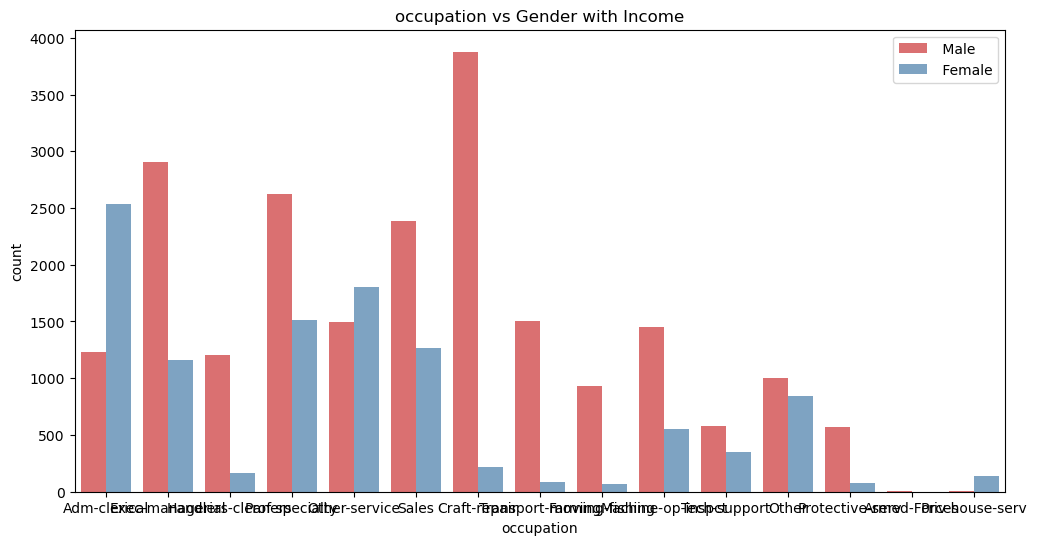

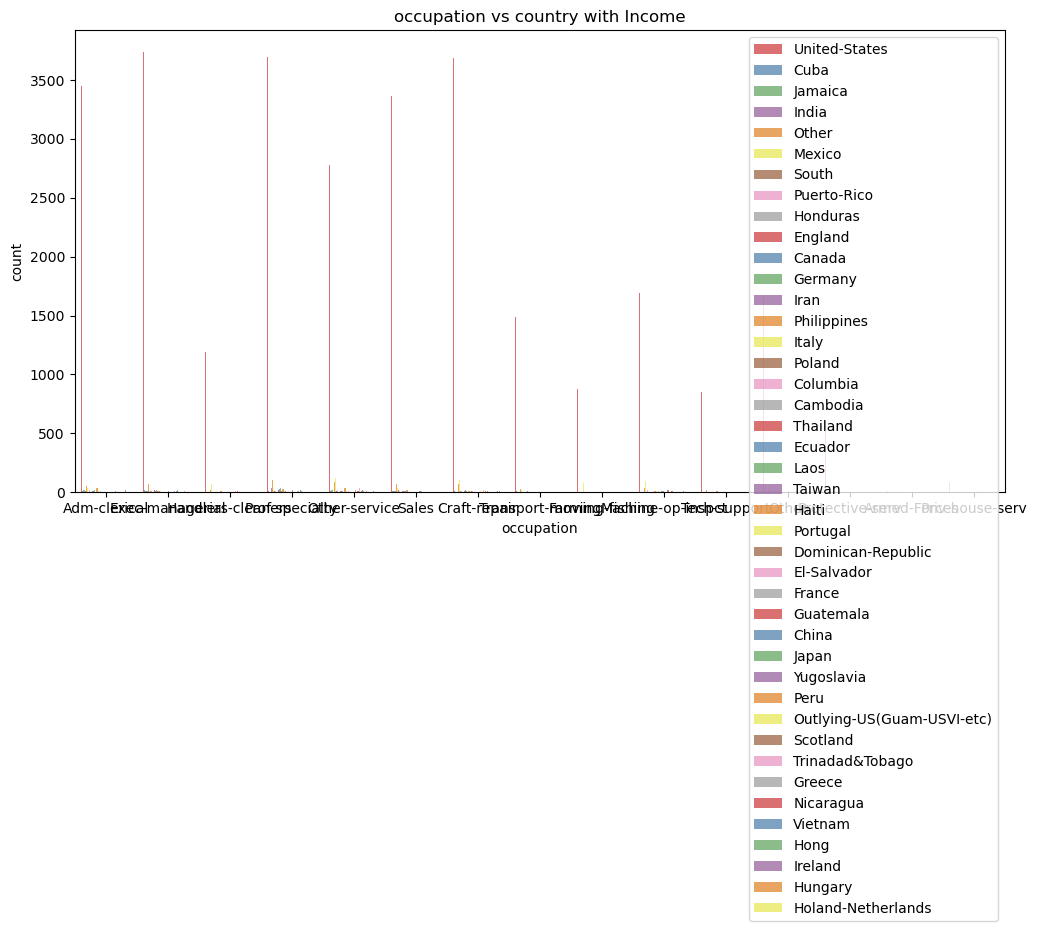

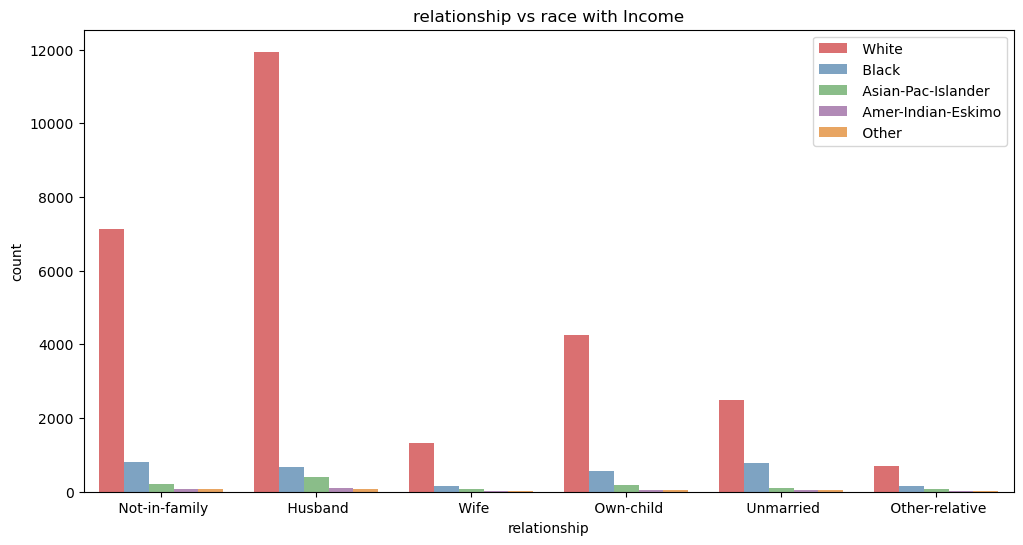

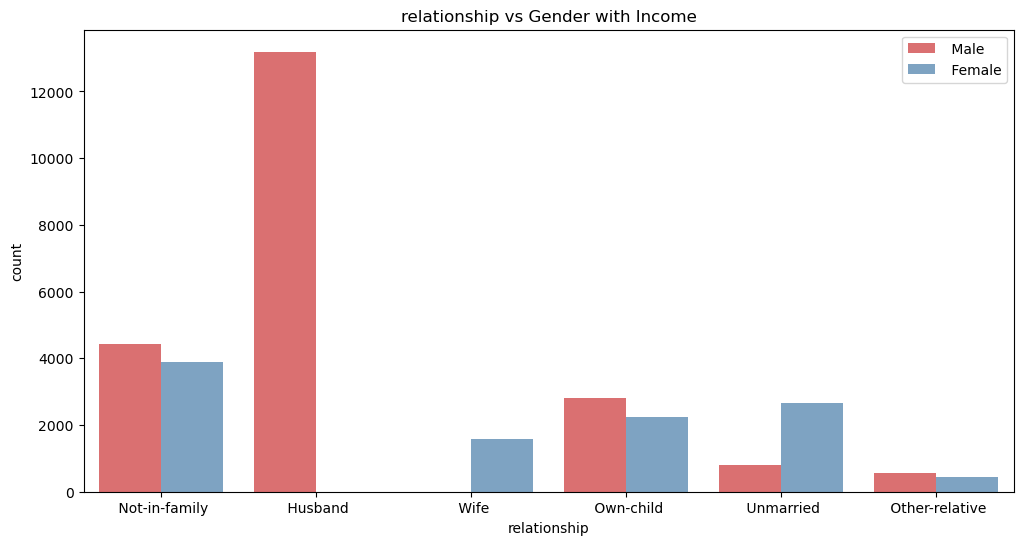

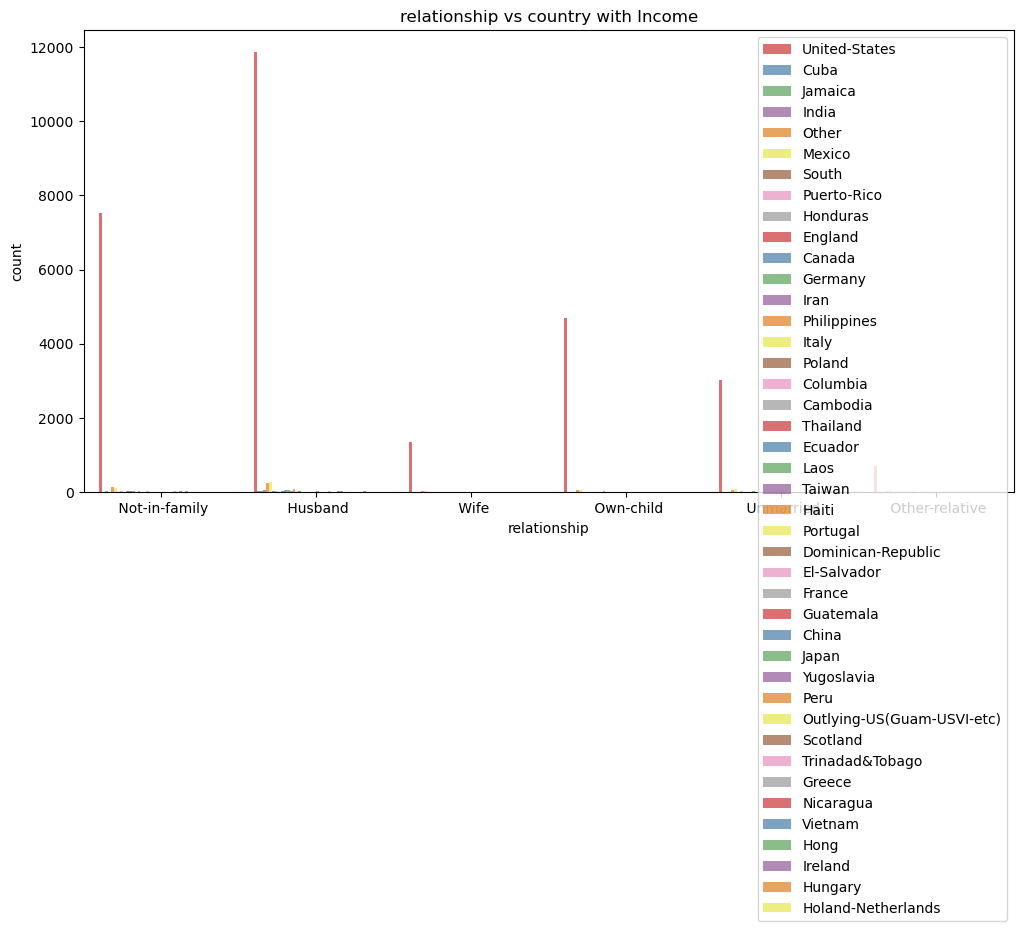

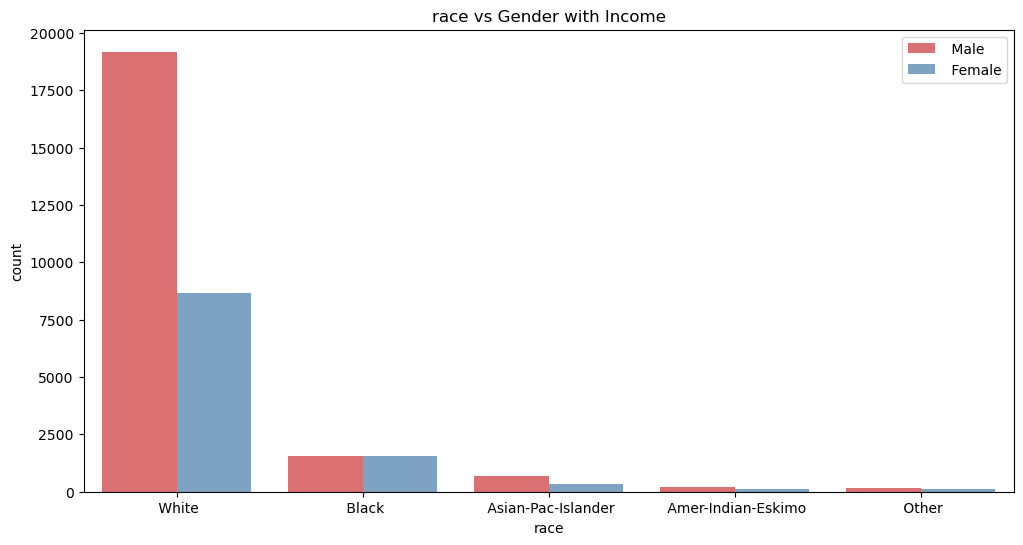

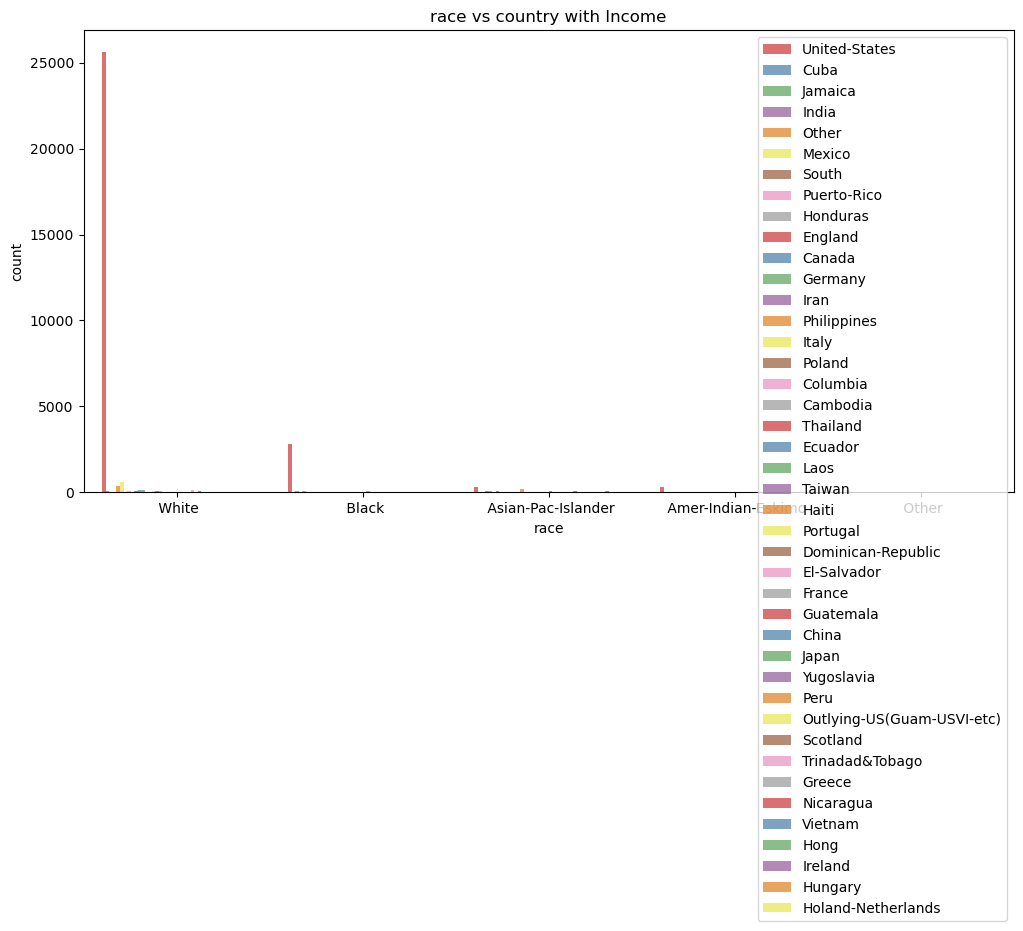

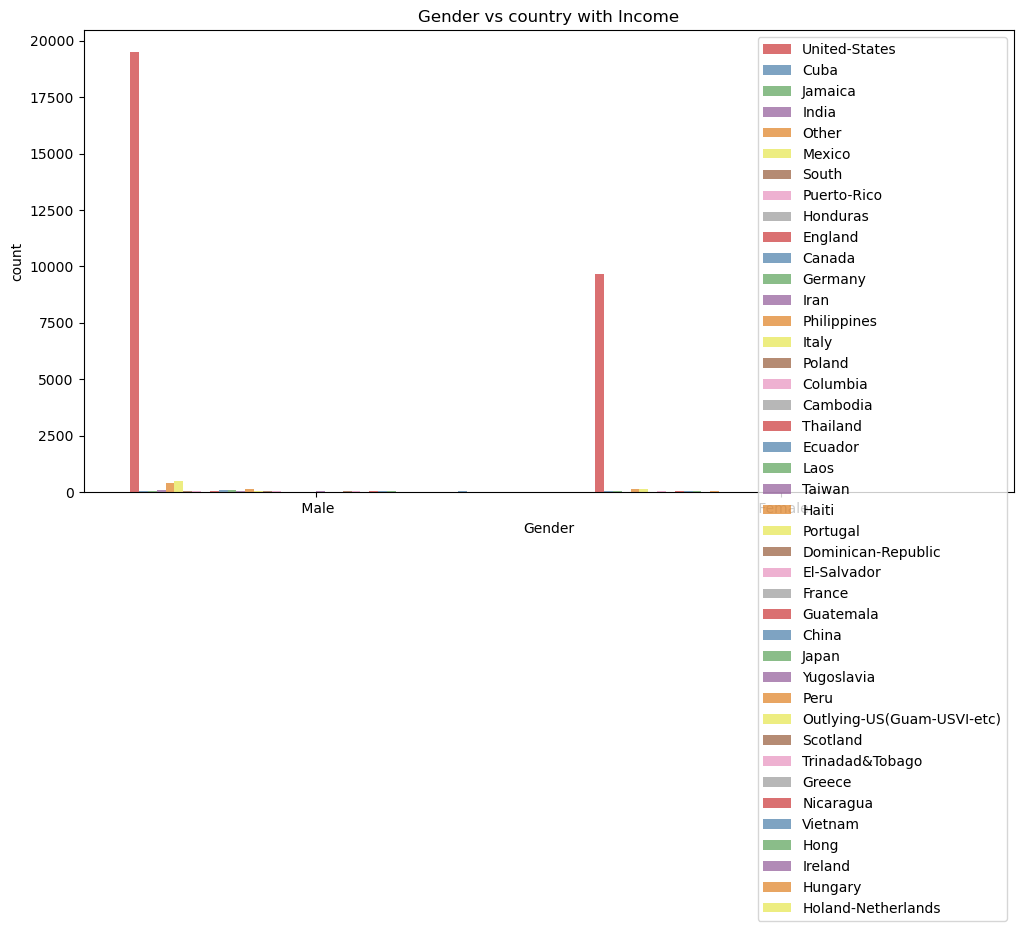

In [40]:


categorical_features = ['Profession Class', 'Education', 'marital-status', 'occupation', 'relationship', 'race', 'Gender', 'country']

# Generate combinations of two categorical features
feature_combinations = [(feat1, feat2) for i, feat1 in enumerate(categorical_features) for feat2 in categorical_features[i + 1:]]

# Plot countplots for each feature combination
for feat1, feat2 in feature_combinations:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feat1, hue=feat2, data=data, palette='Set1', alpha=0.7)
    plt.title(f'{feat1} vs {feat2} with Income')
    plt.legend(loc='upper right')
    plt.show()


In [43]:
# Find duplicate rows based on all columns
duplicate_rows = data[data.duplicated(keep=False)]

# Reset index to obtain row numbers
duplicate_rows = duplicate_rows.reset_index()

# Count occurrences of duplicate rows
duplicate_counts = duplicate_rows.groupby(list(data.columns)).size().reset_index(name='count')

# Print duplicate counts with row numbers
print("Duplicate Counts:")
print(duplicate_counts)




Duplicate Counts:
    Age  Profession Class  Final_census      Education  Education-num  \
0    19           Private         97261        HS-grad              9   
1    19           Private        138153   Some-college             10   
2    19           Private        146679   Some-college             10   
3    19           Private        251579   Some-college             10   
4    20           Private        107658   Some-college             10   
5    21           Private        243368      Preschool              1   
6    21           Private        250051   Some-college             10   
7    23           Private        240137        5th-6th              3   
8    25           Private        195994        1st-4th              2   
9    25           Private        308144      Bachelors             13   
10   27           Private        255582        HS-grad              9   
11   28           Private        274679        Masters             14   
12   30           Private        

In [36]:
# there are 22 columns with same values, Should we keep them or drop them? e.g.
#19	 Private	97261	 HS-grad	9	 Never-married	 Farming-fishing	 Not-in-family	 White	 Male	0	0	40	 United-States	 <=50K
#19	 Private	97261	 HS-grad	9	 Never-married	 Farming-fishing	 Not-in-family	 White	 Male	0	0	40	 United-States	 <=50K
#we need more data because despite everything being same these two 19 year old boys may be from  other locations in USA.

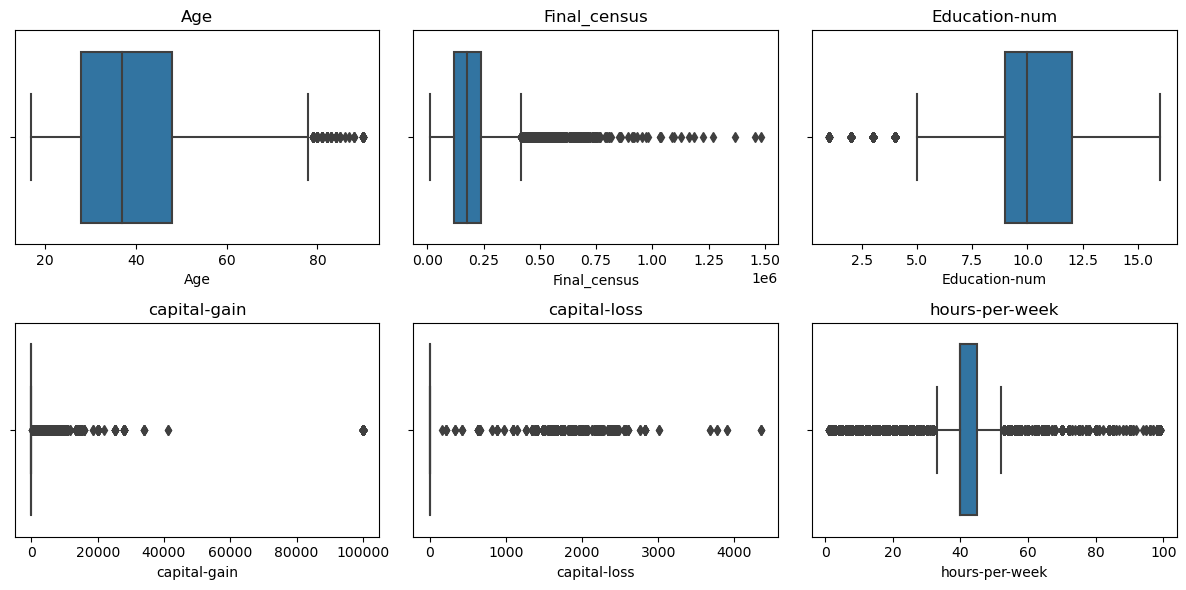

In [44]:
# checking for outliers

import seaborn as sns
import matplotlib.pyplot as plt

# Select the numeric columns from the dataframe
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for each numeric column
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()




In [45]:
data.describe()

Age  Final_census  Education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [46]:

# Calculate z-scores for each numeric column
z_scores = np.abs((data[numeric_columns] - data[numeric_columns].mean()) / data[numeric_columns].std())

# Set threshold for z-scores
threshold = 2 # considering 95% confidence interval

# Identify outliers based on z-scores
outliers = data[z_scores > threshold].dropna()

# Print rows with potential outliers
if outliers.empty:
    print("No potential outliers found.")
else:
    print("Potential Outliers:")
    print(outliers)




No potential outliers found.


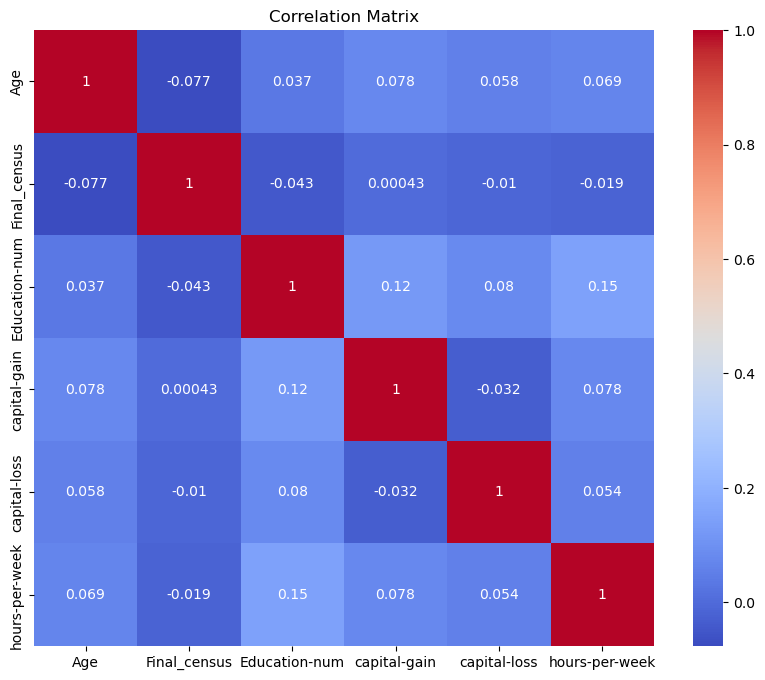

In [47]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Heatmap for categorical feature interactions
#categorical_features = ['Profession Class', 'Education','marital-status', 'occupation','relationship','race','Gender','country']
#subset_data = data[categorical_features]
#subset_data_encoded = pd.get_dummies(subset_data)  # Convert categorical features to numerical representation
#sns.heatmap(subset_data_encoded.corr(), annot=True, cmap='coolwarm')
#plt.title('Categorical Feature Interactions')
#plt.show()



In [41]:
#Heat map shows there is no multicollinearity 

In [48]:
#Significance Test for Categorical features using Chi-square test
import scipy.stats as stats

# Assuming 'categorical_vars' is a list of categorical variables
# and 'target_var' is the target variable
categorical_vars=['Profession Class', 'Education','marital-status', 'occupation','relationship','race','Gender','country']
# Chi-square Test
income ='income'
for var in categorical_vars:
    contingency_table = pd.crosstab(data[var], data['income'])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    if p_value < 0.05:
        print(f"The categorical variable '{var}' and target variable '{income}' are significantly associated.")




The categorical variable 'Profession Class' and target variable 'income' are significantly associated.
The categorical variable 'Education' and target variable 'income' are significantly associated.
The categorical variable 'marital-status' and target variable 'income' are significantly associated.
The categorical variable 'occupation' and target variable 'income' are significantly associated.
The categorical variable 'relationship' and target variable 'income' are significantly associated.
The categorical variable 'race' and target variable 'income' are significantly associated.
The categorical variable 'Gender' and target variable 'income' are significantly associated.
The categorical variable 'country' and target variable 'income' are significantly associated.


In [49]:
# Chi-square Test for pairwise association

import itertools


# Assuming 'categorical_vars' is a list of categorical variables

# Chi-square Test for pairwise association
for var1, var2 in itertools.combinations(categorical_vars, 2):
    contingency_table = pd.crosstab(data[var1], data[var2])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    if p_value < 0.05:
        print(f"The categorical variables '{var1}' and '{var2}' are significantly associated.")
    else:
        print(f"The categorical variables '{var1}' and '{var2}' are not significantly associated.")


The categorical variables 'Profession Class' and 'Education' are significantly associated.
The categorical variables 'Profession Class' and 'marital-status' are significantly associated.
The categorical variables 'Profession Class' and 'occupation' are significantly associated.
The categorical variables 'Profession Class' and 'relationship' are significantly associated.
The categorical variables 'Profession Class' and 'race' are significantly associated.
The categorical variables 'Profession Class' and 'Gender' are significantly associated.
The categorical variables 'Profession Class' and 'country' are significantly associated.
The categorical variables 'Education' and 'marital-status' are significantly associated.
The categorical variables 'Education' and 'occupation' are significantly associated.
The categorical variables 'Education' and 'relationship' are significantly associated.
The categorical variables 'Education' and 'race' are significantly associated.
The categorical variable

In [50]:
#significance test for numerical features using Kruskall-wallis test

# Assuming 'numerical_vars' is a list of numerical predictor variables
# and 'target_var' is the categorical target variable
numerical_vars = ['Age', 'Final_census', 'Education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
target_var = 'income'

# Iterate over each numerical variable
for num_var in numerical_vars:
    groups = []
    for income_class in data[target_var].unique():
        groups.append(data[data[target_var] == income_class][num_var])
    
    # Perform Kruskal-Wallis H test
    h_statistic, p_value = stats.kruskal(*groups)
    
    # Check significance
    if p_value < 0.05:
        print(f"The numerical variable '{num_var}' is significantly associated with the target variable.")



The numerical variable 'Age' is significantly associated with the target variable.
The numerical variable 'Education-num' is significantly associated with the target variable.
The numerical variable 'capital-gain' is significantly associated with the target variable.
The numerical variable 'capital-loss' is significantly associated with the target variable.
The numerical variable 'hours-per-week' is significantly associated with the target variable.


In [51]:
#checking for the distribution of data

numeric_vars = data.select_dtypes(include='number')

# Perform Shapiro-Wilk test for each numeric variable
for column in numeric_vars.columns:
    df = numeric_vars[column].dropna()
    statistic, p_value = stats.shapiro(df)
    
    # Print the test statistic and p-value for each variable
    print(f"Shapiro-Wilk Test for {column}:")
    print(f"Statistic: {statistic}")
    print(f"p-value: {p_value}\n")

Shapiro-Wilk Test for Age:
Statistic: 0.9668066501617432
p-value: 0.0

Shapiro-Wilk Test for Final_census:
Statistic: 0.9223408699035645
p-value: 0.0

Shapiro-Wilk Test for Education-num:
Statistic: 0.9264373779296875
p-value: 0.0

Shapiro-Wilk Test for capital-gain:
Statistic: 0.12271404266357422
p-value: 0.0

Shapiro-Wilk Test for capital-loss:
Statistic: 0.21831119060516357
p-value: 0.0

Shapiro-Wilk Test for hours-per-week:
Statistic: 0.8851711750030518
p-value: 0.0



In [52]:
#Additional tests for checking the distribution of numeric data
numerical_columns = ['Age', 'Final_census', 'Education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


# Create an empty DataFrame to store the test results
test_results = pd.DataFrame(columns=['Column', 'Kolmogorov-Smirnov Statistic', 'Kolmogorov-Smirnov p-value',
                                     'Anderson-Darling Statistic', 'Anderson-Darling Critical Values',
                                     'Anderson-Darling Significance Levels', 'Normaltest Statistic', 'Normaltest p-value',
                                     'Jarque-Bera Statistic', 'Jarque-Bera p-value', 'Skewness', 'Kurtosis'])

# Perform tests for each numeric column
for column in numeric_columns:
    # Extract the numeric data for testing normality
    numeric_data = data[column].dropna()

    # Perform Kolmogorov-Smirnov test
    ks_statistic, ks_p_value = stats.kstest(numeric_data, 'norm')

    # Perform Anderson-Darling test
    ad_statistic, ad_critical_values, ad_significance_levels = stats.anderson(numeric_data, 'norm')

    # Perform normality test
    norm_statistic, norm_p_value = stats.normaltest(numeric_data)

    # Perform Jarque-Bera test
    jb_statistic, jb_p_value = stats.jarque_bera(numeric_data)
    skewness, kurtosis = stats.skew(numeric_data), stats.kurtosis(numeric_data)

    # Append the test results to the DataFrame
    test_results = test_results.append({
        'Column': column,
        'Kolmogorov-Smirnov Statistic': ks_statistic,
        'Kolmogorov-Smirnov p-value': ks_p_value,
        'Anderson-Darling Statistic': ad_statistic,
        'Anderson-Darling Critical Values': ad_critical_values,
        'Anderson-Darling Significance Levels': ad_significance_levels,
        'Normaltest Statistic': norm_statistic,
        'Normaltest p-value': norm_p_value,
        'Jarque-Bera Statistic': jb_statistic,
        'Jarque-Bera p-value': jb_p_value,
        'Skewness': skewness,
        'Kurtosis': kurtosis
    }, ignore_index=True)

# Print the test results
print(test_results)

           Column  Kolmogorov-Smirnov Statistic  Kolmogorov-Smirnov p-value  \
0             Age                      1.000000                         0.0   
1    Final_census                      1.000000                         0.0   
2   Education-num                      0.991924                         0.0   
3    capital-gain                      0.500000                         0.0   
4    capital-loss                      0.500000                         0.0   
5  hours-per-week                      0.997174                         0.0   

   Anderson-Darling Statistic     Anderson-Darling Critical Values  \
0                  238.083019  [0.576, 0.656, 0.787, 0.918, 1.092]   
1                  386.780158  [0.576, 0.656, 0.787, 0.918, 1.092]   
2                 1104.344679  [0.576, 0.656, 0.787, 0.918, 1.092]   
3                10462.487019  [0.576, 0.656, 0.787, 0.918, 1.092]   
4                11656.004574  [0.576, 0.656, 0.787, 0.918, 1.092]   
5                 1763.925

In [47]:
##As the numerical data doesn't seem to be normal it needs to be normalized.

In [53]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['Age', 'Final_census', 'Education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
#  'numerical_columns' is a list of numerical feature column names
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numerical_columns])


In [49]:
#Encoding the categorical variables 
#approach 1: Label encoding
#approach 2: one hot encoding

## Part 1: Analysis using Label encoding

In [54]:
data1=data.copy()
data2=data.copy()

In [55]:
#Label encoding
# Loop over the columns of the dataframe
for column in data1.columns:
    # Check if the column is categorical
    if data1[column].dtype == 'object':
        # Perform label encoding
        label_encoder = LabelEncoder()
        data1[column] = label_encoder.fit_transform(data1[column])


In [65]:
data1.head()

Age  Profession Class  Final_census  Education  Education-num  \
0  0.030671                 7     -1.063611          9       1.134739   
1  0.837109                 6     -1.008707          9       1.134739   
2 -0.042642                 4      0.245079         11      -0.420060   
3  1.057047                 4      0.425801          1      -1.197459   
4 -0.775768                 4      1.408176          9       1.134739   

   marital-status  occupation  relationship  race  Gender  capital-gain  \
0               4           0             1     4       1      0.148453   
1               2           3             0     4       1     -0.145920   
2               0           5             1     4       1     -0.145920   
3               2           5             0     2       1     -0.145920   
4               2          10             5     2       0     -0.145920   

   capital-loss  hours-per-week  country  income  
0      -0.21666       -0.035429       39       0  
1      -0.21666       -2.222153       39       0  
2      -0.21666       -0.035429       39       0  
3      -0.21666       -0.035429       39       0  
4      -0.21666       -0.035429        4       0

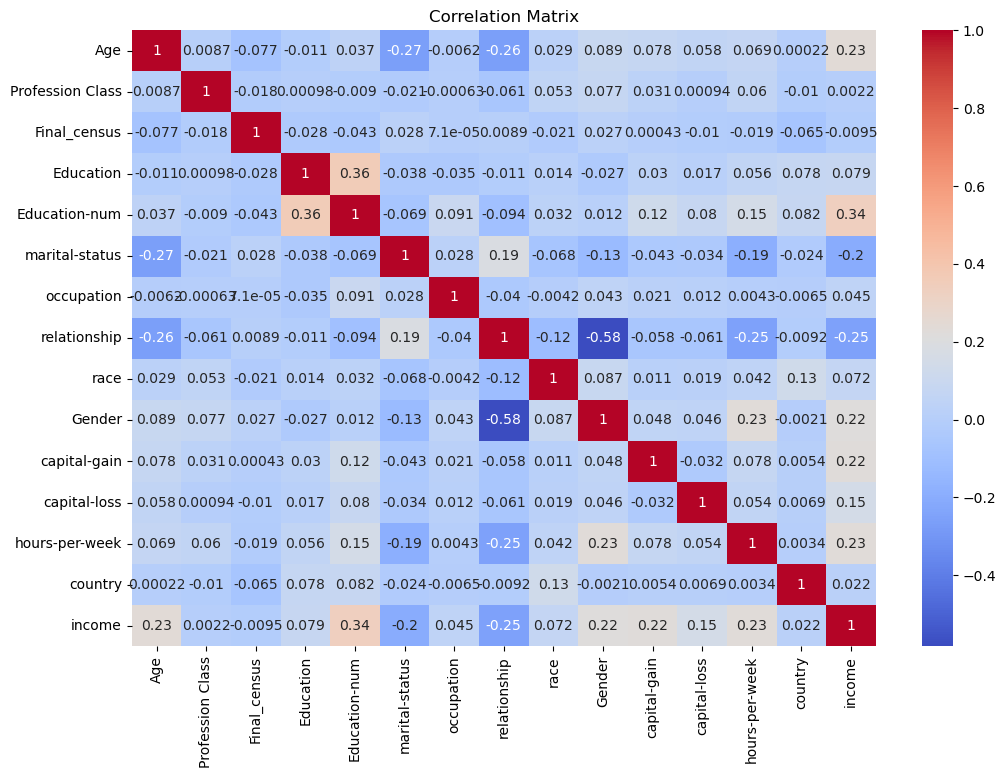

In [63]:
correlation_matrix = data1.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
## there is no multicollinearity

In [68]:
#Converting the target variable from categorical to numerical

from sklearn.preprocessing import LabelEncoder

#  'income' is the name of the target variable column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data1['income'])


In [69]:
print(y[:500])

[0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 

In [70]:
y.dtype

dtype('int64')

In [71]:
X = data1.drop(columns='income')
y


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [60]:
value_counts = np.bincount(y)
num_zeros = value_counts[0]
num_ones = value_counts[1]
print("Number of 0s in y:", num_zeros)
print("Number of 1s in y:", num_ones) 

Number of 0s in y: 24720
Number of 1s in y: 7841


In [61]:
##Number of 0s in y: 24720
#Number of 1s in y: 7841
#According to the output it is an imbalanced data set

In [ ]:
# It is a classification problem. In the fist iteration I am applying multiple classifiers without balancing 
#the minority and majority class.

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate the classification report
    report = classification_report(y_test, y_pred)
    
    # Calculate the confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    
    # Print the model name, accuracy, classification report, and confusion matrix
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{matrix}")
    print()

Logistic Regression Accuracy: 0.8251189927836634
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4942
           1       0.72      0.45      0.55      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.83      0.81      6513

Confusion Matrix:
[[4665  277]
 [ 862  709]]

Decision Tree Accuracy: 0.8194380469829572
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4942
           1       0.62      0.65      0.64      1571

    accuracy                           0.82      6513
   macro avg       0.75      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513

Confusion Matrix:
[[4314  628]
 [ 548 1023]]

Random Forest Accuracy: 0.8624289881774911
Classification Report:
              precision    recall  f1-score   supp

In [ ]:
#XGBoost: Accuracy - 0.873
#Random Forest: Accuracy - 0.862
#AdaBoost: Accuracy - 0.860
#Gradient Boosting: Accuracy - 0.869
#Logistic Regression: Accuracy - 0.825
#Decision Tree: Accuracy - 0.819
#K-Nearest Neighbors: Accuracy - 0.824
#Support Vector Machine: Accuracy - 0.811
#Based on the accuracy scores, the XGBoost model performs the best among the models evaluated.

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate the classification report
    report = classification_report(y_test, y_pred)
    
    # Calculate the confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    
    # Print the model name, accuracy, classification report, and confusion matrix
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{matrix}")
    print()
    
    # Check if the model has feature importances
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        
        # Sort feature importances in descending order
        indices = np.argsort(importances)[::-1]
        
        # Get feature names
        feature_names = X.columns
        
        # Print the feature ranking with names
        print("Feature ranking:")
        for i, idx in enumerate(indices):
            print(f"{i+1}. Feature {feature_names[idx]}: Importance {importances[idx]}")
        print()


Random Forest Accuracy: 0.8638108398587441
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.76      0.64      0.70      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513

Confusion Matrix:
[[4615  327]
 [ 560 1011]]

Feature ranking:
1. Feature Final_census: Importance 0.1676197051600314
2. Feature Age: Importance 0.14960595394129056
3. Feature capital-gain: Importance 0.11532780048659612
4. Feature relationship: Importance 0.09563959448267376
5. Feature Education-num: Importance 0.08927127468254038
6. Feature hours-per-week: Importance 0.08472501434097918
7. Feature marital-status: Importance 0.0712536820131129
8. Feature occupation: Importance 0.06791319122474579
9. Feature Profession Class: Importance 0.04135363597516911
10. Feature capital-loss: Importance 0.03584

In [ ]:
#In the second iteration I am applying multiple classifiers with balancing(SMOTE)
#the minority and majority class.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
# Apply SMOTE to oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
# Apply SMOTE to oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate the classification report
    report = classification_report(y_test, y_pred)
    
    # Calculate the confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    
    # Print the model name, accuracy, classification report, and confusion matrix
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{matrix}")
    print()


Logistic Regression Accuracy: 0.774878640776699
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      4938
           1       0.77      0.79      0.78      4950

    accuracy                           0.77      9888
   macro avg       0.78      0.77      0.77      9888
weighted avg       0.78      0.77      0.77      9888

Confusion Matrix:
[[3750 1188]
 [1038 3912]]

Decision Tree Accuracy: 0.8415250809061489
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4938
           1       0.84      0.85      0.84      4950

    accuracy                           0.84      9888
   macro avg       0.84      0.84      0.84      9888
weighted avg       0.84      0.84      0.84      9888

Confusion Matrix:
[[4121  817]
 [ 750 4200]]

Random Forest Accuracy: 0.8948220064724919
Classification Report:
              precision    recall  f1-score   suppo

In [ ]:
#Above results show that the accuracy increases after balancing the minority class
#Based on the abvoe results it is clear that the top 3 models are all tree based 
#XGBoost (F1 score = 0.90)
#Random Forest (F1 score = 0.89)
#Gradient Boosting (F1 score = 0.86)

In [80]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import model_selection

# Define the number of folds for cross-validation
n_folds = 5

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Perform cross-validation for each model
for model_name, model in models.items():
    # Perform cross-validation
    cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring='accuracy')
    
    # Print the cross-validation scores
    print(f"{model_name} Cross-Validation Scores: {scores}")
    
    # Calculate the average accuracy across all folds
    accuracy = scores.mean()
    
    # Print the average accuracy
    print(f"{model_name} Average Accuracy: {accuracy}")
    
    # Make predictions on the entire dataset using cross-validation
    y_pred = model_selection.cross_val_predict(model, X_resampled, y_resampled, cv=cv)
    
    # Calculate the classification report
    report = classification_report(y_resampled, y_pred)
    
    # Calculate the confusion matrix
    matrix = confusion_matrix(y_resampled, y_pred)
    
    # Print the classification report and confusion matrix
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{matrix}")
    print()


Logistic Regression Cross-Validation Scores: [0.77305825 0.77356392 0.77113673 0.76840615 0.77295712]
Logistic Regression Average Accuracy: 0.771824433656958
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77     24720
           1       0.77      0.77      0.77     24720

    accuracy                           0.77     49440
   macro avg       0.77      0.77      0.77     49440
weighted avg       0.77      0.77      0.77     49440

Confusion Matrix:
[[19030  5690]
 [ 5591 19129]]

Decision Tree Cross-Validation Scores: [0.84941343 0.84718851 0.84375    0.84445793 0.85042476]
Decision Tree Average Accuracy: 0.847046925566343
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     24720
           1       0.85      0.85      0.85     24720

    accuracy                           0.85     49440
   macro avg       0.85      0.85      0.85     49440
w

In [ ]:
# from cross validation report it is clear that model are not overfitting,but as an extra step
#I will also perform hyperparameter tuning 

In [ ]:
## In the last step I perform hyperparameter tuning for the selected best model

In [78]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform, randint


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the models
models = {
    #'Random Forest': RandomForestClassifier(),
    #'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
}

# Define the hyperparameter search space for each model
params = {

    'XGBoost': {
        'n_estimators': randint(10, 50),
        'learning_rate': uniform(0.01, 0.1),
        'max_depth': randint(1, 10),
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 1, 5]
    },
}

# Perform random search for each model
best_models = {}
for model_name, model in models.items():
    print(f"Performing RandomizedSearchCV for {model_name}")
    random_search = RandomizedSearchCV(estimator=model, param_distributions=params[model_name], cv=5, n_iter=100, verbose=1, random_state=42)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    best_models[model_name] = best_model

# Evaluate the best models on the test data
for model_name, best_model in best_models.items():
    print(f"Evaluating {model_name}")
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    print(f"Best Model Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{matrix}")

Performing RandomizedSearchCV for XGBoost
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Evaluating XGBoost
Best Model Accuracy: 0.8738875404530745
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      4938
           1       0.85      0.91      0.88      4950

    accuracy                           0.87      9888
   macro avg       0.88      0.87      0.87      9888
weighted avg       0.88      0.87      0.87      9888

Confusion Matrix:
[[4118  820]
 [ 427 4523]]


In [ ]:
# From above report it is clear that hyperparameter tuning is not necessary 

# Part 2: Use of one hot encoding 

In [81]:
# Loop over the columns of the dataframe
for column in data2.columns:
    # Check if the column is categorical
    if data2[column].dtype == 'object' and column != 'income':
        data2_encoded = pd.get_dummies(data2[column], prefix=column)
        data2 = pd.concat([data2, data2_encoded], axis=1)
        data2.drop(column, axis=1, inplace=True)

final_data = data2


In [87]:
final_data.head()


Age  Final_census  Education-num  capital-gain  capital-loss  \
0  0.030671     -1.063611       1.134739      0.148453      -0.21666   
1  0.837109     -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642      0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047      0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768      1.408176       1.134739     -0.145920      -0.21666   

   hours-per-week  income  Profession Class_Federal-gov  \
0       -0.035429   <=50K                             0   
1       -2.222153   <=50K                             0   
2       -0.035429   <=50K                             0   
3       -0.035429   <=50K                             0   
4       -0.035429   <=50K                             0   

   Profession Class_Local-gov  Profession Class_Never-worked  ...  \
0                           0                              0  ...   
1                           0                              0  ...   
2                           0                              0  ...   
3                           0                              0  ...   
4                           0                              0  ...   

   country_Portugal  country_Puerto-Rico  country_Scotland  country_South  \
0                 0                    0                 0              0   
1                 0                    0                 0              0   
2                 0                    0                 0              0   
3                 0                    0                 0              0   
4                 0                    0                 0              0   

   country_Taiwan  country_Thailand  country_Trinadad&Tobago  \
0               0                 0                        0   
1               0                 0                        0   
2               0                 0                        0   
3               0                 0                        0   
4               0                 0                        0   

   country_United-States  country_Vietnam  country_Yugoslavia  
0                      1                0                   0  
1                      1                0                   0  
2                      1                0                   0  
3                      1                0                   0  
4                      0                0                   0  

[5 rows x 109 columns]

In [94]:
from sklearn.preprocessing import LabelEncoder

# 'income' is the name of the target variable column
label_encoder = LabelEncoder()
final_data['income_encoded'] = label_encoder.fit_transform(final_data['income'])
final_data.drop('income', axis=1, inplace=True)

In [96]:
final_data.head()

Age  Final_census  Education-num  capital-gain  capital-loss  \
0  0.030671     -1.063611       1.134739      0.148453      -0.21666   
1  0.837109     -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642      0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047      0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768      1.408176       1.134739     -0.145920      -0.21666   

   hours-per-week  Profession Class_Federal-gov  Profession Class_Local-gov  \
0       -0.035429                             0                           0   
1       -2.222153                             0                           0   
2       -0.035429                             0                           0   
3       -0.035429                             0                           0   
4       -0.035429                             0                           0   

   Profession Class_Never-worked  Profession Class_Other source  ...  \
0                              0                              0  ...   
1                              0                              0  ...   
2                              0                              0  ...   
3                              0                              0  ...   
4                              0                              0  ...   

   country_Puerto-Rico  country_Scotland  country_South  country_Taiwan  \
0                    0                 0              0               0   
1                    0                 0              0               0   
2                    0                 0              0               0   
3                    0                 0              0               0   
4                    0                 0              0               0   

   country_Thailand  country_Trinadad&Tobago  country_United-States  \
0                 0                        0                      1   
1                 0                        0                      1   
2                 0                        0                      1   
3                 0                        0                      1   
4                 0                        0                      0   

   country_Vietnam  country_Yugoslavia  income_encoded  
0                0                   0               0  
1                0                   0               0  
2                0                   0               0  
3                0                   0               0  
4                0                   0               0  

[5 rows x 109 columns]

In [97]:
##correlation matrix for encoded and numerical features
corr_matrix=final_data.corr()
corr_matrix

Age  Final_census  Education-num  capital-gain  \
Age                      1.000000     -0.076646       0.036527      0.077674   
Final_census            -0.076646      1.000000      -0.043195      0.000432   
Education-num            0.036527     -0.043195       1.000000      0.122630   
capital-gain             0.077674      0.000432       0.122630      1.000000   
capital-loss             0.057775     -0.010252       0.079923     -0.031615   
...                           ...           ...            ...           ...   
country_Trinadad&Tobago  0.004843      0.005273      -0.017071     -0.003526   
country_United-States    0.015917     -0.075287       0.101207      0.004599   
country_Vietnam         -0.015054     -0.011398      -0.007483     -0.002564   
country_Yugoslavia       0.000375      0.005501      -0.001234     -0.002193   
income_encoded           0.234037     -0.009463       0.335154      0.223329   

                         capital-loss  hours-per-week  \
Age                      5.777454e-02        0.068756   
Final_census            -1.025171e-02       -0.018768   
Education-num            7.992296e-02        0.148123   
capital-gain            -3.161506e-02        0.078409   
capital-loss             1.000000e+00        0.054256   
...                               ...             ...   
country_Trinadad&Tobago  8.102329e-03       -0.006006   
country_United-States    8.783567e-03        0.002446   
country_Vietnam         -5.997599e-07       -0.011379   
country_Yugoslavia      -4.803919e-03        0.007408   
income_encoded           1.505263e-01        0.229689   

                         Profession Class_Federal-gov  \
Age                                          0.051227   
Final_census                                -0.007525   
Education-num                                0.060518   
capital-gain                                -0.005768   
capital-loss                                 0.010798   
...                                               ...   
country_Trinadad&Tobago                     -0.004212   
country_United-States                        0.015441   
country_Vietnam                              0.000099   
country_Yugoslavia                          -0.003865   
income_encoded                               0.059372   

                         Profession Class_Local-gov  \
Age                                        0.060901   
Final_census                              -0.002828   
Education-num                              0.097941   
capital-gain                              -0.007007   
capital-loss                               0.014668   
...                                             ...   
country_Trinadad&Tobago                   -0.001148   
country_United-States                      0.033196   
country_Vietnam                           -0.003611   
country_Yugoslavia                        -0.000161   
income_encoded                             0.033091   

                         Profession Class_Never-worked  \
Age                                          -0.019362   
Final_census                                  0.005031   
Education-num                                -0.015117   
capital-gain                                 -0.002140   
capital-loss                                 -0.003177   
...                                                ...   
country_Trinadad&Tobago                      -0.000354   
country_United-States                         0.005000   
country_Vietnam                              -0.000666   
country_Yugoslavia                           -0.000325   
income_encoded                               -0.008259   

                         Profession Class_Other source  ...  \
Age                                           0.042627  ...   
Final_census                                 -0.002923  ...   
Education-num                                -0.077946  ...   
capital-gain                                 -0.015585  ...   
capital-loss              

In [98]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
upper

Age  Final_census  Education-num  capital-gain  \
Age                      NaN     -0.076646       0.036527      0.077674   
Final_census             NaN           NaN      -0.043195      0.000432   
Education-num            NaN           NaN            NaN      0.122630   
capital-gain             NaN           NaN            NaN           NaN   
capital-loss             NaN           NaN            NaN           NaN   
...                      ...           ...            ...           ...   
country_Trinadad&Tobago  NaN           NaN            NaN           NaN   
country_United-States    NaN           NaN            NaN           NaN   
country_Vietnam          NaN           NaN            NaN           NaN   
country_Yugoslavia       NaN           NaN            NaN           NaN   
income_encoded           NaN           NaN            NaN           NaN   

                         capital-loss  hours-per-week  \
Age                          0.057775        0.068756   
Final_census                -0.010252       -0.018768   
Education-num                0.079923        0.148123   
capital-gain                -0.031615        0.078409   
capital-loss                      NaN        0.054256   
...                               ...             ...   
country_Trinadad&Tobago           NaN             NaN   
country_United-States             NaN             NaN   
country_Vietnam                   NaN             NaN   
country_Yugoslavia                NaN             NaN   
income_encoded                    NaN             NaN   

                         Profession Class_Federal-gov  \
Age                                          0.051227   
Final_census                                -0.007525   
Education-num                                0.060518   
capital-gain                                -0.005768   
capital-loss                                 0.010798   
...                                               ...   
country_Trinadad&Tobago                           NaN   
country_United-States                             NaN   
country_Vietnam                                   NaN   
country_Yugoslavia                                NaN   
income_encoded                                    NaN   

                         Profession Class_Local-gov  \
Age                                        0.060901   
Final_census                              -0.002828   
Education-num                              0.097941   
capital-gain                              -0.007007   
capital-loss                               0.014668   
...                                             ...   
country_Trinadad&Tobago                         NaN   
country_United-States                           NaN   
country_Vietnam                                 NaN   
country_Yugoslavia                              NaN   
income_encoded                                  NaN   

                         Profession Class_Never-worked  \
Age                                          -0.019362   
Final_census                                  0.005031   
Education-num                                -0.015117   
capital-gain                                 -0.002140   
capital-loss                                 -0.003177   
...                                                ...   
country_Trinadad&Tobago                            NaN   
country_United-States                              NaN   
country_Vietnam                                    NaN   
country_Yugoslavia                                 NaN   
income_encoded                                     NaN   

                         Profession Class_Other source  ...  \
Age                                           0.042627  ...   
Final_census                                 -0.002923  ...   
Education-num                                -0.077946  ...   
capital-gain                                 -0.015585  ...   
capital-loss                                 -0.016102  ...   
...               

In [99]:
## checking multicollinearity
# Define the threshold value
threshold = 0.7

# Create an empty list to store the elements above the threshold
above_threshold = []

# Iterate over the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        correlation = corr_matrix.iloc[i, j]
        
        # Check if the correlation value is above the threshold
        if abs(correlation) > threshold:
            above_threshold.append((corr_matrix.columns[i], corr_matrix.columns[j], correlation))

# Print the elements above the threshold
for element in above_threshold:
    print(f"{element[0]} - {element[1]} : {element[2]}")


Profession Class_Other source - occupation_Other : 0.997985412037873
marital-status_ Married-civ-spouse - relationship_ Husband : 0.8932103331306749
race_ Black - race_ White : -0.7887474517027836
Gender_ Female - Gender_ Male : -0.9999999999999998


In [ ]:
##splitting data into features and target columns

In [100]:
X = final_data.drop(columns='income_encoded')
y=final_data['income_encoded']


In [101]:
X.head()

Age  Final_census  Education-num  capital-gain  capital-loss  \
0  0.030671     -1.063611       1.134739      0.148453      -0.21666   
1  0.837109     -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642      0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047      0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768      1.408176       1.134739     -0.145920      -0.21666   

   hours-per-week  Profession Class_Federal-gov  Profession Class_Local-gov  \
0       -0.035429                             0                           0   
1       -2.222153                             0                           0   
2       -0.035429                             0                           0   
3       -0.035429                             0                           0   
4       -0.035429                             0                           0   

   Profession Class_Never-worked  Profession Class_Other source  ...  \
0                              0                              0  ...   
1                              0                              0  ...   
2                              0                              0  ...   
3                              0                              0  ...   
4                              0                              0  ...   

   country_Portugal  country_Puerto-Rico  country_Scotland  country_South  \
0                 0                    0                 0              0   
1                 0                    0                 0              0   
2                 0                    0                 0              0   
3                 0                    0                 0              0   
4                 0                    0                 0              0   

   country_Taiwan  country_Thailand  country_Trinadad&Tobago  \
0               0                 0                        0   
1               0                 0                        0   
2               0                 0                        0   
3               0                 0                        0   
4               0                 0                        0   

   country_United-States  country_Vietnam  country_Yugoslavia  
0                      1                0                   0  
1                      1                0                   0  
2                      1                0                   0  
3                      1                0                   0  
4                      0                0                   0  

[5 rows x 108 columns]

In [102]:
## Fitting various ML models on the data without balancing the target variable


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate the classification report
    report = classification_report(y_test, y_pred)
    
    # Calculate the confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    
    # Print the model name, accuracy, classification report, and confusion matrix
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{matrix}")
    print()

Logistic Regression Accuracy: 0.8576692768309535
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4942
           1       0.75      0.61      0.68      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513

Confusion Matrix:
[[4620  322]
 [ 605  966]]

Decision Tree Accuracy: 0.8220482112697681
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4942
           1       0.63      0.65      0.64      1571

    accuracy                           0.82      6513
   macro avg       0.76      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513

Confusion Matrix:
[[4339  603]
 [ 556 1015]]

Random Forest Accuracy: 0.8593582066635959
Classification Report:
              precision    recall  f1-score   supp

In [ ]:
## Again from the above result the tree based algorithms are performing better

In [103]:
##Checking feature importances

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate the classification report
    report = classification_report(y_test, y_pred)
    
    # Calculate the confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    
    # Print the model name, accuracy, classification report, and confusion matrix
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{matrix}")
    print()
    
    # Check if the model has feature importances
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        
        # Sort feature importances in descending order
        indices = np.argsort(importances)[::-1]
        
        # Get feature names
        feature_names = X.columns
        
        # Print the feature ranking with names
        print("Feature ranking:")
        for i, idx in enumerate(indices):
            print(f"{i+1}. Feature {feature_names[idx]}: Importance {importances[idx]}")
        print()


Random Forest Accuracy: 0.8575157377552587
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.74      0.63      0.68      1571

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513

Confusion Matrix:
[[4596  346]
 [ 582  989]]

Feature ranking:
1. Feature Final_census: Importance 0.15839528247611598
2. Feature Age: Importance 0.14768529608919384
3. Feature capital-gain: Importance 0.09799597124602101
4. Feature hours-per-week: Importance 0.08379463145512801
5. Feature marital-status_ Married-civ-spouse: Importance 0.06448531752797775
6. Feature Education-num: Importance 0.058589536559427974
7. Feature relationship_ Husband: Importance 0.04222157789745464
8. Feature capital-loss: Importance 0.030124100304249432
9. Feature marital-status_ Never-married: Importance 0.02510241191766

Gradient Boosting Accuracy: 0.8721019499462613
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4942
           1       0.80      0.62      0.70      1571

    accuracy                           0.87      6513
   macro avg       0.85      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513

Confusion Matrix:
[[4702  240]
 [ 593  978]]

Feature ranking:
1. Feature marital-status_ Married-civ-spouse: Importance 0.3880809891948056
2. Feature capital-gain: Importance 0.20004461837643459
3. Feature Education-num: Importance 0.19877451576718796
4. Feature Age: Importance 0.05744975350941947
5. Feature capital-loss: Importance 0.05676834118623122
6. Feature hours-per-week: Importance 0.03456830101821469
7. Feature occupation_Exec-managerial: Importance 0.016243874649903237
8. Feature occupation_Prof-specialty: Importance 0.006321639179335579
9. Feature occupation_Farming-fishing: Importanc

In [104]:
##Model fitting after class balancing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
# Apply SMOTE to oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
# Apply SMOTE to oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate the classification report
    report = classification_report(y_test, y_pred)
    
    # Calculate the confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    
    # Print the model name, accuracy, classification report, and confusion matrix
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{matrix}")
    print()


Logistic Regression Accuracy: 0.8619538834951457
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      4938
           1       0.84      0.90      0.87      4950

    accuracy                           0.86      9888
   macro avg       0.86      0.86      0.86      9888
weighted avg       0.86      0.86      0.86      9888

Confusion Matrix:
[[4086  852]
 [ 513 4437]]

Decision Tree Accuracy: 0.8462783171521036
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4938
           1       0.84      0.86      0.85      4950

    accuracy                           0.85      9888
   macro avg       0.85      0.85      0.85      9888
weighted avg       0.85      0.85      0.85      9888

Confusion Matrix:
[[4124  814]
 [ 706 4244]]

Random Forest Accuracy: 0.8965412621359223
Classification Report:
              precision    recall  f1-score   supp

In [ ]:
## from above analysis the top 3 models are Random forest,SVM and XGboost.

In [105]:
## checking for overfitting using cross validation for top 3 models

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import model_selection

# Define the number of folds for cross-validation
n_folds = 5

# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    
}

# Perform cross-validation for each model
for model_name, model in models.items():
    # Perform cross-validation
    cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring='accuracy')
    
    # Print the cross-validation scores
    print(f"{model_name} Cross-Validation Scores: {scores}")
    
    # Calculate the average accuracy across all folds
    accuracy = scores.mean()
    
    # Print the average accuracy
    print(f"{model_name} Average Accuracy: {accuracy}")
    
    # Make predictions on the entire dataset using cross-validation
    y_pred = model_selection.cross_val_predict(model, X_resampled, y_resampled, cv=cv)
    
    # Calculate the classification report
    report = classification_report(y_resampled, y_pred)
    
    # Calculate the confusion matrix
    matrix = confusion_matrix(y_resampled, y_pred)
    
    # Print the classification report and confusion matrix
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{matrix}")
    print()

Random Forest Cross-Validation Scores: [0.89846278 0.896339   0.89644013 0.89502427 0.89714806]
Random Forest Average Accuracy: 0.8966828478964401
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89     24720
           1       0.88      0.92      0.90     24720

    accuracy                           0.90     49440
   macro avg       0.90      0.90      0.90     49440
weighted avg       0.90      0.90      0.90     49440

Confusion Matrix:
[[21614  3106]
 [ 1977 22743]]

Support Vector Machine Cross-Validation Scores: [0.87641586 0.87580906 0.87328074 0.87247168 0.87206715]
Support Vector Machine Average Accuracy: 0.8740088996763754
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87     24720
           1       0.84      0.92      0.88     24720

    accuracy                           0.87     49440
   macro avg       0.88      0.87      0.87    

In [ ]:
## XGboost gives the best result.